In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
# %matplotlib qt5
%matplotlib inline

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import os
import scipy.optimize as opt
from lmfit import Model, create_params, minimize
from lmfit.printfuncs import report_fit


# create a color maps from DARK2

def get_colors(n):
    from matplotlib.cm import Dark2
    return Dark2(np.linspace(0,1,n))

# plt.style.use('prx')
plt.style.use('S:\Connie\prx.mplstyle')
# data_dir = '/Volumes/slab/QRAM/qram_4QR2/data/'
data_dir = 'S:/QRAM/qram_4QR2/data/'

# plt.style.use('paper_2')

# fontsize = 13

# %config InlineBackend.figure_format = 'svg'


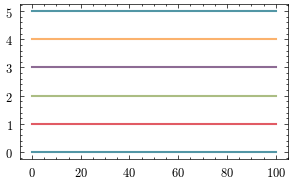

In [3]:
x_sweep = np.linspace(0, 100, 100)
plt.figure()
for i in range(6):
    plt.plot(x_sweep, i*np.ones_like(x_sweep))
plt.show()

In [4]:
# %aimport experiments
import experiments as meas

Could not import QickInstrument (will only work if running on rfsoc). If running on rfsoc, try install/update qick package
Warning failed to import AWG81180A
Warning failed to import Tek5014
Warning failed to import Tek70001
Warning failed to import M8195A
Could not load InstrumentManagerWindow
Could not load labbrick
Could not load Autonics TM4 Driver
Could not load Oxford Trition driver


c:\ProgramData\Anaconda3\lib\site-packages\IPython\qt.py:12: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  warn("The `IPython.qt` package has been deprecated since IPython 4.0. "


imported experiments.clifford_averager_program
imported experiments.fitting
imported experiments.four_qubit.fourQ_state_tomo
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.single_shot
imported experiments.single_qubit.t1
imported experiments.single_qubit.t2_ramsey
imported experiments.three_qubit.threeQ_state_tomo
imported experiments.two_qubit.amplitude_rabi_EgGf
imported experiments.two_qubit.amplitude_rabi_f0g1
imported experiments.two_qubit.amprabi_opt_ctrl_state_prep
imported experiments.two_qubit.crosstalk_echo_calib
imported experiments.two_qubit.length_rabi_EgGf
imported experiments.two_qubit.length_rabi_F0G1
imported exper

In [5]:
# config_file = 'config_zcu216.yml'
# config_file = 'config_q3diamond.yml'
config_file = 'config_q3diamond_full688and638_reset.yml'
config_path = os.path.join('s:\\Connie\\experiments\\qram_tprocv1_expts\\configs\\', config_file)
print('Config will be', config_path)

Config will be s:\Connie\experiments\qram_tprocv1_expts\configs\config_q3diamond_full688and638_reset.yml


In [6]:
from slab.datamanagement import SlabFile
import json
from slab import get_next_filename, AttrDict

"""Reopen saved data"""
def prev_data(expt_path, filename=None):
    temp_data_file = expt_path
    if filename is not None: temp_data_file = os.path.join(expt_path, filename)
    print(temp_data_file)
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

# Import the h5 file and check the keys

In [ ]:
filename = '_rabi_EgGf_freqlen_chevron_qubit21.h5'
folder = 'data_240617'
idx_name = np.arange(25, 49, 1)

amps = []
freqs = []
time = []
I = []
Q = []

# open all file that contains the filename str in the folder
for i in idx_name:
        _filename = '000' + str(i) + filename 
        file = h5py.File(folder+'/'+_filename, 'r')
        _amps = file['amps']
        _freqs = file['freqpts']
        _time = file['lenpts']
        _i = file['avgi']
        _q = file['avgq']
        amps.append(np.array(_amps))
        freqs.append(np.array(_freqs))
        time.append(np.array(_time))
        I.append(np.array(_i))
        Q.append(np.array(_q))

In [ ]:
file.keys()

In [ ]:
# plot a 2d maps of the amps vs freqs and gain

# plot all file 

qb = 0


for i in idx_name:
    idx = np.unravel_index(np.argmax(amps[i-25][qb], axis=None), amps[i-25][qb].shape)
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(amps[i-25][qb], aspect='auto', extent=[time[i-25][1], time[i-25][-1], freqs[i-25][0], freqs[i-25][-1]])

    ax.plot(time[i-25][idx[1]], freqs[i-25][idx[0]], 'ro')
    ax.set_title('file ' + str(i))



In [ ]:
# for each file take the frequency slice for which the amplitude is maximum
fig, ax = plt.subplots(1, 2, figsize=(7, 5))
for i in idx_name[5:14]:

    idx = np.unravel_index(np.argmax(amps[i-25][qb], axis=None), amps[i-25][qb].shape)
    _amp_plot_time = amps[i-25][qb][idx[0], :]
    ax[0].plot(time[i-25], _amp_plot_time, label='file ' + str(i))
    ax[0].set_title('Amp vs time')
    _amp_plot_freq = amps[i-25][qb][:, idx[1]] 
    ax[1].plot(freqs[i-25], _amp_plot_freq, label='file ' + str(i))
    ax[1].set_title('Amp vs freq')



# ax.legend()


# check the ramp time

In [ ]:
filename = '_rabi_EgGf_freqlen_chevron_qubit21.h5'
# folder = 'data_240617'
idx_name = np.array([122, 139,146, 148, 149, 151])

amps = []
freqs = []
time = []
I = []
Q = []

# open all file that contains the filename str in the folder
for i in idx_name:
        _filename = '00' + str(i) + filename 
        print(_filename)
        # file = h5py.File(folder+'/'+_filename, 'r')
        file = h5py.File(_filename, 'r')
        _amps = file['amps']
        _freqs = file['freqpts']
        _time = file['lenpts']
        _i = file['avgi']
        _q = file['avgq']
        amps.append(np.array(_amps))
        freqs.append(np.array(_freqs))
        time.append(np.array(_time))
        I.append(np.array(_i))
        Q.append(np.array(_q))

In [ ]:
# plot a 2d maps of the amps vs freqs and gain

# plot all file 

qb = 0


for i in range(len(idx_name)):
    idx = np.unravel_index(np.argmax(amps[i][qb], axis=None), amps[i][qb].shape)
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(amps[i][qb], aspect='auto', extent=[time[i][1], time[i][-1], freqs[i][0], freqs[i][-1]])

    ax.plot(time[i][idx[1]], freqs[i][idx[0]], 'ro')
    ax.set_title('file ' + str(i))



In [ ]:
# for each file plot the slice 

# time_to_plot = [0.250, 0.580]
# time_to_plot = [0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1, 1.1]
time_to_plot = time[-1]

for i in range(len(idx_name)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    print(amps[i].shape)
    idx_plot = [np.argmin(np.abs(time[i] - time_to_plot[p])) for p in range(len(time_to_plot))]
    [ax.plot(freqs[i], amps[i][qb][:, idx_plot[p]], label='time = ' + str(time[i][idx_plot[p]])) for p in range(len(time_to_plot))]
    # for each trace and a point for the max 
    [ax.plot(freqs[i][np.argmax(amps[i][qb][:, idx_plot[p]])], np.max(amps[i][qb][:, idx_plot[p]]), 'ro') for p in range(len(time_to_plot))]
    ax.legend()



# Qubit monitoring

In [ ]:
qubits = [0,1,2,3]
file_name_qubit = ['00012', '00025', '00013', '00014']
folder = 'data_240617'

t1_tab = []
t1err_tab = []
time_t1_tab = []
t2_tab = []
t2err_tab = []
time_t2_tab = []
qb_freq = []
for idxq, qubit_i in enumerate(qubits):
        
    fname_t1 = file_name_qubit[qubit_i] + f'_t1_time_sweep_qubit{qubit_i}.h5'
    fname_t2 = file_name_qubit[qubit_i] + f'_t2r_time_sweep_qubit{qubit_i}.h5'

    file_t1 = h5py.File(folder +'/' + fname_t1, 'r')
    file_t2 = h5py.File(folder+'/'+fname_t2, 'r')
    
    time_t1 = np.asarray(file_t1['times'])
    t1_fit = np.asarray(file_t1['t1_fit'])
    t1_fit_err = np.asarray(file_t1['t1_fit_err'])

    time_t2r = np.asarray(file_t2['times'])
    t2r_fit = np.asarray(file_t2['t2r_fit'])
    t2r_fit_err = np.asarray(file_t2['t2r_fit_err'])
    freq_qb = np.asarray(file_t2['freq_qb'])


    t1_err_bounds = [0.01, 20]
    t2r_err_bounds = [0.01, 100]
    
    idx_remove_t1 = np.where((t1_fit_err < t1_err_bounds[0]) | (t1_fit_err > t1_err_bounds[1]))[0]
    idx_remove_t2r = np.where((t2r_fit_err < t2r_err_bounds[0]) | (t2r_fit_err > t2r_err_bounds[1]))[0]
    

    time_t1 = np.delete(time_t1, idx_remove_t1)
    t1_fit = np.delete(t1_fit, idx_remove_t1)
    t1_fit_err = np.delete(t1_fit_err, idx_remove_t1)

    time_t2r = np.delete(time_t2r, idx_remove_t2r)
    t2r_fit = np.delete(t2r_fit, idx_remove_t2r)
    t2r_fit_err = np.delete(t2r_fit_err, idx_remove_t2r)
    freq_qb = np.delete(freq_qb, idx_remove_t2r)
    
        
    t1_tab.append(t1_fit)
    t1err_tab.append(t1_fit_err)
    time_t1_tab.append(time_t1)
    
    t2_tab.append(t2r_fit)
    t2err_tab.append(t2r_fit_err)
    time_t2_tab.append(time_t2r)
    
    qb_freq.append(freq_qb)
    



# freq_qb = file['freq_qb']
# times = file['times']
# filename = '00014_t2r_time_sweep_qubit1.h5'
# folder = 'data_240617'
# file = h5py.File(folder+'/'+filename, 'r')

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(6, 6), sharex=True)


for idxq, qubit_i in enumerate(qubits):

    ax[0].errorbar(time_t1_tab[idxq]/60/60, t1_tab[idxq], yerr=t1err_tab[idxq], fmt='o-',  elinewidth=1, 
                   label=f'Qubit {qubit_i}', markersize=3, linewidth=1)
    ax[0].set_ylabel('T1 (us)')
    # ax[0].set_xlabel('Time (hrs)')

    ax[1].errorbar(time_t2_tab[idxq]/60/60, t2_tab[idxq], yerr=t2err_tab[idxq], fmt='o-', elinewidth=1,
                    label=f'Qubit {qubit_i}', markersize=3, linewidth=1)
    ax[1].set_ylabel('T2R (us)')
    # ax[1].set_xlabel('Time (hrs)')

    ax[2].plot(time_t2_tab[idxq]/60/60, (qb_freq[idxq] - np.mean(qb_freq[idxq])), 'o-', label=f'Qubit {qubit_i}',  markersize=3, linewidth=1)
    ax[2].set_ylabel('Frequency shift (MHz)')
    ax[2].set_xlabel('Time (hrs)')

ax[0].legend()

# Single shot 

In [51]:
def multihist(data, check_qubit, qubits, check_states, play_pulses_list, g_states, e_states, theta=None, plot=True, verbose=True, fit=True, mat=None, test=False):
    """
    span: histogram limit is the mean +/- span
    theta given and returned in deg
    assume data is passed in form data['iqshots'] = [(idata, qdata)]*len(check_states), idata=[... *num_shots]*4
    check_states: an array of strs of the init_state specifying each configuration to plot a histogram for
    play_pulses_list: list of play_pulses corresponding to check_states, see code for play_pulses
    g_states are indices to the check_states to categorize as "g" (the rest are "e")
    """
    numbins = 200
    shot_tab = []
    bin_tab = []
    p_tab = []
    if fit: 
        amp_max = []
        amp_min = []
        amp_max_err = []
        amp_min_err = []
    
    iqshots = data['iqshots']
    if plot:
        fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
        fig.suptitle(f'Readout on $|Q{qubits[0]}\\rangle |Q{qubits[1]}\\rangle$, check Q{check_qubit}')
        fig.tight_layout()
        # axs[0,0].set_xlabel('I [ADC levels]')
        axs[0,0].set_ylabel('Q [ADC levels]')
        axs[0,0].set_title('Unrotated')
        axs[0,0].axis('equal')

        # axs[0,1].set_xlabel('I [ADC levels]')
        axs[0,1].axis('equal')

        axs[1,0].set_ylabel('Counts')
        axs[1,0].set_xlabel('I [ADC levels]')       

        axs[1,1].set_xlabel('I [ADC levels]')

        plt.subplots_adjust(hspace=0.25, wspace=0.15)        

        Ig_tot = []
        Qg_tot = []
        Ie_tot = []
        Qe_tot = []
        for check_i, data_check in enumerate(iqshots):
            I, Q = data_check
            I = I[check_qubit]
            Q = Q[check_qubit]
            if check_i in g_states:
                Ig_tot = np.concatenate((Ig_tot, I))
                Qg_tot = np.concatenate((Qg_tot, Q))
            elif check_i in e_states:
                Ie_tot = np.concatenate((Ig_tot, I))
                Qe_tot = np.concatenate((Qg_tot, Q))

        """Compute the rotation angle"""
        if theta is None:
            xg, yg = np.median(Ig_tot), np.median(Qg_tot)
            xe, ye = np.median(Ie_tot), np.median(Qe_tot)
            theta = -np.arctan2((ye-yg), (xe-xg))
        else: theta *= np.pi/180

        Ig_tot_new = Ig_tot*np.cos(theta) - Qg_tot*np.sin(theta)
        Qg_tot_new = Ig_tot*np.sin(theta) + Qg_tot*np.cos(theta) 
        Ie_tot_new = Ie_tot*np.cos(theta) - Qe_tot*np.sin(theta)
        Qe_tot_new = Ie_tot*np.sin(theta) + Qe_tot*np.cos(theta) 
        I_tot_new = np.concatenate((Ie_tot_new, Ig_tot_new))
        span = (np.max(I_tot_new) - np.min(I_tot_new))/2
        midpoint = (np.max(I_tot_new) + np.min(I_tot_new))/2
        xlims = [midpoint-span, midpoint+span]

    n_tot_g = [0]*numbins
    n_tot_e = [0]*numbins
    for check_i, data_check in enumerate(iqshots):
        check_state = check_states[check_i]
        play_pulses = play_pulses_list[check_i]

        I, Q = data_check
        I = I[check_qubit]
        Q = Q[check_qubit]

        xmed, ymed = np.median(I), np.median(Q)

        if verbose:
            print(check_state, 'play_pulses', play_pulses, 'unrotated medians:')
            print(f'I {xmed} +/- {np.std(I)} \t Q {ymed} +/- {np.std(Q)} \t Amp {np.abs(xmed+1j*ymed)}')

        """Rotate the IQ data"""
        I_new = I*np.cos(theta) - Q*np.sin(theta)
        Q_new = I*np.sin(theta) + Q*np.cos(theta) 

        """New means of each blob"""
        xmed_new, ymed_new = np.median(I_new), np.median(Q_new)
        if verbose:
            print(f'Rotated (theta={theta}):')
            print(f'I {xmed_new} +/- {np.std(I_new)} \t Q {ymed_new} +/- {np.std(Q_new)} \t Amp {np.abs(xmed_new+1j*ymed_new)}')

        if plot:
            label = f'{check_state}'
            if len(play_pulses) > 1 or play_pulses[0] != 0:
                label += f' play {play_pulses}'
            axs[0,0].scatter(I, Q, label=label, marker='.', edgecolor='None', alpha=0.3)
            axs[0,0].plot([xmed], [ymed], color='k', linestyle=':', marker='o', markersize=5)

            axs[0,1].scatter(I_new, Q_new, label=label, marker='.', edgecolor='None', alpha=0.3)
            axs[0,1].plot([xmed_new], [ymed_new], color='k', linestyle=':', marker='o', markersize=5)


            n, bins, p = axs[1,0].hist(I_new, bins=numbins, range=xlims,  label=label, histtype='step')

            if fit:
                # fit with a double gaussian
                p_guess = [np.max(n), xmed_new, 100, np.max(n), xmed_new - 200, 100]
                bounds = ([0, xmed_new-200, 0, 0, xmed_new-1000, 0], [np.inf, xmed_new+1000, np.inf, np.inf, xmed_new, np.inf])
                popt, pcov = opt.curve_fit(double_gaussian, bins[:-1], n, p0=p_guess, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
                perr = np.sqrt(np.diag(pcov))
                axs[1,0].plot(bins[:-1], double_gaussian(bins[:-1], *popt), color='black')

                id_max = np.argmax([popt[0], popt[3]])

                if id_max == 0:
                    amp_max.append(popt[0])
                    amp_min.append(popt[3])
                    amp_max_err.append(perr[0])
                    amp_min_err.append(perr[3])
                else:
                    amp_max.append(popt[3])
                    amp_min.append(popt[0])
                    amp_max_err.append(perr[3])
                    amp_min_err.append(perr[0])

                print('state: ' + check_state)
                print('amp_max: ', amp_max[-1], '+/-', amp_max_err[-1])
                print('amp_min: ', amp_min[-1], '+/-', amp_min_err[-1])
                print('pop wrong state (%): ', amp_min[-1]/(amp_max[-1] + amp_min[-1])*100)

                p_min = amp_min[-1]/(amp_max[-1] + amp_min[-1])
                p_max = amp_max[-1]/(amp_max[-1] + amp_min[-1])
                p_vec = np.array([p_min, p_max])
                p_tab.append(p_vec)


        
            axs[1,1].plot(bins[:-1], np.cumsum(n)/n.sum(), label=label)

        else: # just getting the n, bins for data processing
            n, bins = np.histogram(I_new, bins=numbins, range=xlims)

        shot_tab.append(n)
        bin_tab.append(bins)

        if check_i in g_states: 
            n_tot_g += n
            bins_g = bins
        elif check_i in e_states: 
            n_tot_e += n
            bins_e = bins


    """Compute the fidelity using overlap of the histograms"""
    fids = []
    thresholds = []
    contrast = np.abs(np.cumsum(n_tot_g)/n_tot_g.sum() - np.cumsum(n_tot_e)/n_tot_e.sum())
    tind=contrast.argmax()
    thresholds.append(bins[tind])
    fids.append(contrast[tind])

    # calibration matrix

    mat = np.zeros((2, 2))
    idx_g = np.argmin(np.abs(bins_g- thresholds[-1]))

    print('idx_g', idx_g)
    print(bins_g[idx_g])
    print(thresholds[-1])

    mat[0, 0] = np.sum(n_tot_g[:idx_g])
    mat[1, 0] = np.sum(n_tot_g[idx_g:])

    idx_e = np.argmin(np.abs(bins_e - thresholds[-1]))
    print('idx_e', idx_e)
    print(bins_e[idx_e])
    print(thresholds[-1])
    mat[0, 1] = np.sum(n_tot_e[:idx_e])
    mat[1, 1] = np.sum(n_tot_e[idx_e:])

    mat /= np.sum(n_tot_e)
    print('calibration matrix')
    print(mat)

    # apply calibration matrix to all state 

    mat_inv = np.linalg.inv(mat)
    n_tab = []

    for idx in range(len(shot_tab)):
        thresh = np.argmin(np.abs(bin_tab[idx]- thresholds[-1]))
        n_g = np.sum(shot_tab[idx][:thresh])
        n_e = np.sum(shot_tab[idx][thresh:])
        n = np.array([n_g, n_e])
        n = n/np.sum(n)
        n = np.dot(mat_inv, n)
        n_tab.append(n)
        print('state: ', check_states[idx])
        print('calibrated state: ', n)



    if plot: 
        axs[0,1].set_title(f'Rotated ($\\theta={theta*180/np.pi:.5}^\\circ$)')
        
        axs[1,0].axvline(thresholds[0], color='0.2', linestyle='--')
        axs[1,0].set_title(f'Fidelity g-e: {100*fids[0]:.3}%')

        axs[1,1].plot(bins[:-1], np.cumsum(n_tot_g)/n_tot_g.sum(), 'b', label='g')
        axs[1,1].plot(bins[:-1], np.cumsum(n_tot_e)/n_tot_e.sum(), 'r', label='e')
        axs[1,1].axvline(thresholds[0], color='0.2', linestyle='--')

        prop = {'size': 8}
        axs[0,0].legend(loc='upper right', prop=prop)
        axs[0,1].legend(loc='upper right', prop=prop)
        axs[1,0].legend(loc='upper left', prop=prop)
        axs[1,1].legend(prop=prop)

        plt.show()



    if test: 

        # plot 
        fig2, ax2 = plt.subplots(1, 1, figsize=(6, 6))

        # fit the histogram with a double gaussian

        xmax_g = bins_g[np.argmax(n_tot_g)]
        xmax_e = bins_e[np.argmax(n_tot_e)]

        ymax_g = np.max(n_tot_g)
        ymax_e = np.max(n_tot_e)

        print('xmax_g', xmax_g)
        print('xmax_e', xmax_e)
        print('ymax_g', ymax_g)
        print('ymax_e', ymax_e)

        popt_g = [ymax_g, xmax_g, 100, ymax_e, xmax_e, 100]
        popt_e = [ymax_e, xmax_e, 100, ymax_g, xmax_g, 100]



        # bounds = ([0, 0, bins_g[0], 0, 0, bins_e[0], 0], [np.inf, np.inf, bins_g[-1], np.inf, np.inf, bins_e[-1], np.inf])


        popt_g, pcov_g = opt.curve_fit(double_gaussian, bins_g[:-1], n_tot_g, p0=popt_g, maxfev=10000, xtol=1e-15, ftol=1e-15)
        popt_e, pcov_e = opt.curve_fit(double_gaussian, bins_e[:-1], n_tot_e, p0=popt_e, maxfev=10000, xtol=1e-15, ftol=1e-15)

        ax2.plot(bins[:-1], n_tot_g, label='g')
        ax2.plot(bins[:-1], n_tot_e, label='e')

        ax2.plot(bins_g[:-1], double_gaussian(bins_g[:-1], *popt_g), color='black')
        ax2.plot(bins_e[:-1], double_gaussian(bins_e[:-1], *popt_e), color='black')

        print('pop for g wrong state (%): ', popt_g[3]/(popt_g[0] + popt_g[3])*100)
        print('pop for e wrong state (%): ', popt_e[3]/(popt_e[0] + popt_e[3])*100)

    

    return fids, thresholds, theta*180/np.pi, n_tab, p_tab # fids: ge, gf, ef


# define a double gaussian function
def double_gaussian(x, a1, b1, c1, a2, b2, c2):
    return a1*np.exp(-(x - b1)**2/(2*c1**2)) + a2*np.exp(-(x - b2)**2/(2*c2**2))


In [109]:
# filename1 = '00009_QramSingleShotHist.h5'
# filename2 = '00010_QramSingleShotHist.h5'

filename1 = '00005_QramSingleShotHist.h5'
filename2 = '00006_QramSingleShotHist.h5'
folder = 'data_240617'

data1 = h5py.File(folder+'/'+filename1, 'r')
data2 = h5py.File(folder+'/'+filename2, 'r')


In [110]:
# check_states = ['Q2Q1_|0>|0>', 'Q2Q1_|0>|1>', 'Q2Q1_|1>|0>', '|0>|1>']
check_states = ['Q2Q1_|0>|0>', 'Q2Q1_|0>|1>', 'Q2Q1_|2>|0>', '|0>|1>']
play_pulses_list = [[0], [0], [0], [1, 3], [1, 3], [1, 3], [1, 3]]

# mat_cal = np.array([[0.930325, 0.11815 ], [0.069675, 0.88185 ]])
# mat_cal = np.array([[0.95035, 0.057075], [0.04965,  0.942925]]])

In [ ]:
fids, thresholds, angle, n_tab, p_tab = multihist(data=data1, check_qubit=2,
                                    check_states=check_states,play_pulses_list=play_pulses_list,
                                      qubits=[1,2], g_states=[0],e_states=[2], theta=None, plot=True, verbose=True, fit=True, test = True)

In [ ]:
fids, thresholds, angle, n_tab, p_tab = multihist(data=data2, check_qubit=2,
                                    check_states=check_states,play_pulses_list=play_pulses_list,
                                      qubits=[1,2], g_states=[0],e_states=[2], theta=None, plot=True, verbose=True, fit=True)

In [ ]:
calib_amp1 = 100 - 5.612460159835197
swap_amp1 = 100 - 14.457410445531224

calib_amp2 = 100 - 9.421839753118547
swap_amp2 = 100 - 16.02897011158023
print('using gaussian fit')
print('swap fidelity active cooldown: ', swap_amp1/calib_amp1*100)
print('swap fidelity no cooldown: ', swap_amp2/calib_amp2*100)
print('using threshold and calibration matrix')
print('swap fidelity active cooldown: ', 0.94711731*100)
print('swap fidelity no cooldown: ', 0.91866623*100)



calib_amp1 = 100 - 5.612460159835197
swap_amp1 = 100 - 10.314368687567882

calib_amp2 = 100 - 3.4672368995299045
swap_amp2 = 100 - 12.231930578660803

print('only eg-gf')
print('using gaussian fit')
print('swap fidelity active cooldown: ', swap_amp1/calib_amp1*100)
print('swap fidelity no cooldown: ', swap_amp2/calib_amp2*100)
print('using threshold and calibration matrix')
print('swap fidelity active cooldown: ', 0.94350158*100)
print('swap fidelity no cooldown: ', 0.90828692*100)

# Fidelity versus number of swap

In [ ]:
filenumbers = ['00012', '00013','00014','00015','00016']


fid_swap_thresh = []
p_all = []


for filenumber in filenumbers:
    filename = filenumber + '_QramSingleShotHist.h5'
    data = h5py.File(folder+'/'+filename, 'r')
    fids, thresholds, angle, n_tab, p_tab  = multihist(data=data, check_qubit=2,
                                    check_states=check_states,play_pulses_list=play_pulses_list,
                                      qubits=[1,2], g_states=[0],e_states=[2], theta=None, plot=True, verbose=True, fit=True)
    
    print('fidelity: ', n_tab)
    fid_swap_thresh.append(n_tab[-1][1])
    p_all.append(p_tab)

In [115]:
fid_swap_gauss = np.zeros(len(filenumbers))

for l in range(len(p_all)):

    p_calib = p_all[l][2][1]
    p_swap = p_all[l][-1][1]
    fid_swap_gauss[l] = p_swap/p_calib

In [ ]:
x = 1+ 2*np.arange(len(filenumbers))
y = np.array(fid_swap_thresh)
y2 = fid_swap_gauss

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.plot(x, y*100, 'o-', label='Threshold', color='#445fab')
ax.plot(x, y2*100, marker='v', color='#ab4d44', markersize=8, label='Gaussian fit', linewidth=0)
ax.set_xticks(x)

ax.set_ylabel('EG-GF Fidelity (%)')
ax.set_xlabel('Number of SWAP')

ax.legend()

### Checking the swap fidelity with the post selection

In [127]:
filename = '00152_length_rabi_EgGf_qubit21.h5'

file = h5py.File(folder+'/'+filename, 'r')

In [ ]:
file.keys()

In [ ]:
np.asanyarray(file['epop'])

# RB analysis

## RB

In [7]:
state_subspace_12 = ['geg', 'ggf']
state_subspace_13 = ['eeg', 'egf']

state_leak = ['ggg', 'gge', 'gee', 'gef', 'egg', 'ege','eee', 'eef']

switch_e = ['eeg', 'egf', 'egg', 'ege','eee', 'eef']
switch_g = ['geg', 'ggf', 'ggg', 'gge', 'gee', 'gef']

calib_order = ['ggg', 'gge', 'ggf', 'geg', 'gee', 'gef', 'egg', 'ege', 'egf', 'eeg', 'eee', 'eef']
state_name_str = calib_order


state_erasure = []

# state_leak = ['gg']
# # state_erasure = ['ee', 'ge', 'ef']
# state_erasure = ['ee', 'ge']

In [ ]:
file_name_q1q2 = '00004_rb_EgGf_qubit21.h5'
file_name_q1q2_bis = '00005_rb_EgGf_qubit21.h5'
file_name_q1q2_irb = '00006_rb_EgGf_qubit21.h5'
file_name_q1q2_irb_bis = '00007_rb_EgGf_qubit21.h5'
# file_name_q1q2 = '00012_rb_EgGf_qubit21.h5'
# file_name_q1q2_bis = '00013_rb_EgGf_qubit21.h5'
# file_name_q1q2_irb = '00014_rb_EgGf_qubit21.h5'
# file_name_q1q2_irb_bis = '00015_rb_EgGf_qubit21.h5'


# file_name_q1q3 = '00007_rb_EgGf_qubit31.h5'
# file_name_q1q3_bis = '00008_rb_EgGf_qubit31.h5'
# file_name_q1q3_irb = '00010_rb_EgGf_qubit31.h5'
# file_name_q1q3_irb_bis = '00011_rb_EgGf_qubit31.h5'
file_name_q1q3 = '00014_rb_EgGf_qubit31.h5'
file_name_q1q3_bis = '00015_rb_EgGf_qubit31.h5'
file_name_q1q3_irb = '00016_rb_EgGf_qubit31.h5'
file_name_q1q3_irb_bis = '00017_rb_EgGf_qubit31.h5'

folder = 'data_250119'
file_path_q1q2 = data_dir +'/' + folder+'/'+file_name_q1q2
file_path_q1q2_bis = data_dir +'/' + folder+'/'+file_name_q1q2_bis
file_path_q1q3 = data_dir +'/' + folder+'/'+file_name_q1q3
file_path_q1q3_bis = data_dir +'/' + folder+'/'+file_name_q1q3_bis
file_path_q1q2_irb = data_dir +'/' + folder+'/'+file_name_q1q2_irb
file_path_q1q2_irb_bis = data_dir +'/' + folder+'/'+file_name_q1q2_irb_bis
file_path_q1q3_irb = data_dir +'/' + folder+'/'+file_name_q1q3_irb
file_path_q1q3_irb_bis = data_dir +'/' + folder+'/'+file_name_q1q3_irb_bis
# file_q1q2 = h5py.File(data_dir +'/' + folder+'/'+file_name_q1q2, 'r')
# file_q1q3 = h5py.File(data_dir +'/' + folder+'/'+file_name_q1q3, 'r')
# print(file_q1q3.keys())



In [9]:
def fit(x, p, B, A):
    return B*p**x + A

#### Import the q1q3 data

In [51]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q3)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']
state_name_str = rbprog.calib_order

data_13 = rbprog.analyze(fit=True)



S:/QRAM/qram_4QR2/data//data_250119/00014_rb_EgGf_qubit31.h5
Extracted data and attrs ['calib_order', 'config']
[  1.  15.  30.  45.  60.  75.  90. 105. 120. 135.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

fit1 p1, a, offset [0.99042934 0.88213172 0.08763511]
fit2 a0, b0, c0, p2 [0.06243052 0.00570229 0.90459136 0.98885887]


In [52]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q3_bis)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']
state_name_str = rbprog.calib_order

data_13_bis = rbprog.analyze(fit=True)


S:/QRAM/qram_4QR2/data//data_250119/00015_rb_EgGf_qubit31.h5
Extracted data and attrs ['calib_order', 'config']
[150. 200. 250. 300.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

fit1 p1, a, offset [0.99193207 0.97533105 0.02485249]
fit2 a0, b0, c0, p2 [0.01479981 0.57002086 1.         0.98106656]


 C:\Users\slab\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_minpack_py.py: 1010

In [10]:
filename = file_name_q1q3[:5] + '_' + file_name_q1q3_bis[:5] + '_merged_rb_EgGf_qubit31.npz'
full_filename = os.path.join(data_dir, folder, filename)

# # SAVE THE DATA
# # xpts = file_q1q3['xpts']
# _xpts = data_13['xpts']
# _xpts_bis = data_13_bis['xpts']
# z = 1.96

# # pop_13 = np.asarray(file_q1q3['poplns_2q'])
# pop_13 = np.asarray(data_13['poplns_2q'])
# pop_13_bis = np.asarray(data_13_bis['poplns_2q'])
# pop_13_merged = np.concatenate((pop_13, pop_13_bis), axis=0)
# xpts_merged = np.concatenate((_xpts, _xpts_bis), axis=1)

# # save the data 
# np.savez(full_filename, pop_13=pop_13_merged, xpts=xpts_merged)
# print('saving', full_filename)

In [11]:
# reload the data
data = np.load(full_filename)
pop_13 = data['pop_13']
xpts = data['xpts']
n = len(np.asarray(xpts)[0])

pop_dict_13 = {}
pop_dict_13['avg'] = {}
pop_dict_13['err'] = {}
for idx, state in enumerate(state_name_str):
    # do the average and error postselected where pop_13 should be < 1
    
    _pop = pop_13[:, :, idx]
    _pop_post_avg = np.zeros(_pop.shape[0])
    _pop_post_err = np.zeros(_pop.shape[0])
    for i in range(_pop.shape[0]):
        pop_slice = _pop[i, :]
        idx_post = np.where(pop_slice < 1)
        _pop_post = pop_slice[idx_post]
        _pop_post_avg[i] = _pop_post.mean()
        _pop_post_err[i] = _pop_post.std()/np.sqrt(len(_pop_post))
    pop_dict_13['avg'][state] = _pop_post_avg
    pop_dict_13['err'][state] = _pop_post_err

    # pop_dict_13['avg'][state] = pop_13[:, :, idx].mean(axis=1)
    # pop_dict_13['err'][state] = pop_13[:, :, idx].std(axis=1)/np.sqrt(n)
    x_rb_13 = np.unique(xpts)
print(xpts) 

[[  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 300]
 [  1  15  30  45  60  75  90 105 120 135 150 200 250 30

In [12]:
# define the subspace population and its error
popln_subspace_avg_13=  np.sum([pop_dict_13['avg'][state] for state in state_subspace_13], axis=0)
popln_subspace_err_13 = np.std([pop_dict_13['err'][state] for state in state_subspace_13], axis=0)/np.sqrt(n)


_pop_temp = np.zeros_like(pop_13[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_subspace_13:
        _pop_temp += pop_13[:, :, idx]
popln_subspace_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)


# define the eg/(eg+gf) and its error
popln_eg_13 = pop_dict_13['avg']['eeg']
popln_eg_renorm_13 = popln_eg_13/popln_subspace_avg_13

idx_eg = state_name_str.index('eeg')
_pop_temp = pop_13[:, :, idx_eg]
popln_eg_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)

idx_eg = state_name_str.index('eeg')
idx_gf = state_name_str.index('egf')
_pop_temp = pop_13[:, :, idx_eg]/(pop_13[:, :, idx_eg] + pop_13[:, :, idx_gf])
popln_eg_renorm_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)



popln_not_erase_13 = 1 - np.sum([pop_dict_13['avg'][state] for state in state_erasure], axis=0)
_pop_temp = np.zeros_like(pop_13[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_erasure:
        _pop_temp += pop_13[:, :, idx]
popln_not_erase_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)

In [ ]:
# _pop_temp = np.zeros_like(pop_13[:, :, 0])

# for idx, state in enumerate(state_name_str):
#     if state in state_subspace_13:
#         _pop_temp += pop_13[:, :, idx]
# popln_subspace_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)

# popln_subspace_err_13 = np.zeros(pop_13[:, :, 0].shape[0])
# _pop_temp = np.zeros_like(pop_13[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_subspace_13:
#         _pop_temp += pop_13[:, :, idx]
        
# for i in range(_pop_temp.shape[0]):
#     pop_slice = _pop[i, :]
#     idx_post = np.where(pop_slice < 1)
#     _pop_post = pop_slice[idx_post]
#     popln_subspace_err_13[i] = _pop_post.std()/np.sqrt(len(_pop_post))
         
# # popln_subspace_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)

# # define the subspace population and its error
# popln_subspace_avg_13 = np.sum([pop_dict_13['avg'][state] for state in state_subspace_13], axis=0)
# popln_subspace_err_13 = np.std([pop_dict_13['err'][state] for state in state_subspace_13], axis=0)/np.sqrt(n)


# # _pop_temp = np.zeros_like(pop_13[:, :, 0])
# # for idx, state in enumerate(state_name_str):
# #     if state in state_subspace_13:
# #         _pop_temp += pop_13[:, :, idx]
# # popln_subspace_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)


# popln_subspace_err_13 = np.zeros(pop_13[:, :, 0].shape[0])
# _pop_temp = np.zeros_like(pop_13[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_subspace_13:
#         _pop_temp += pop_13[:, :, idx]
        
# for i in range(_pop_temp.shape[0]):
#     pop_slice = _pop[i, :]
#     idx_post = np.where(pop_slice < 1)
#     _pop_post = pop_slice[idx_post]
#     popln_subspace_err_13[i] = _pop_post.std()/np.sqrt(len(_pop_post))
            
            
# # define the eg/(eg+gf) and its error
# popln_eg_13 = pop_dict_13['avg']['eeg']
# popln_eg_renorm_13 = popln_eg_13/popln_subspace_avg_13

# idx_eg = state_name_str.index('eeg')
# _pop_temp = pop_13[:, :, idx_eg]
# popln_eg_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)

# idx_eg = state_name_str.index('eeg')
# idx_gf = state_name_str.index('egf')
# _pop_temp = pop_13[:, :, idx_eg]/(pop_13[:, :, idx_eg] + pop_13[:, :, idx_gf])
# popln_eg_renorm_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)



# popln_not_erase_13 = 1 - np.sum([pop_dict_13['avg'][state] for state in state_erasure], axis=0)
# _pop_temp = np.zeros_like(pop_13[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_erasure:
#         _pop_temp += pop_13[:, :, idx]
# popln_not_erase_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)


#### Import the q1q2 data

In [121]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q2)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']

data_12 = rbprog.analyze(fit=True)

S:/QRAM/qram_4QR2/data//data_250119/00012_rb_EgGf_qubit21.h5
Extracted data and attrs ['calib_order', 'config']
[  1.  15.  30.  45.  60.  75.  90. 105. 120. 135.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

fit1 p1, a, offset [0.98756766 0.88436174 0.06129387]
fit2 a0, b0, c0, p2 [4.33460855e-18 4.93767497e-01 4.11987017e-01 9.48838807e-01]


In [122]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q2_bis)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']
state_name_str = rbprog.calib_order

data_12_bis = rbprog.analyze(fit=True)

S:/QRAM/qram_4QR2/data//data_250119/00013_rb_EgGf_qubit21.h5
Extracted data and attrs ['calib_order', 'config']
[150. 200. 250. 300.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

fit1 p1, a, offset [0.99118436 0.80062904 0.00365122]
fit2 a0, b0, c0, p2 [3.53081185e-16 3.40098150e-01 4.09463389e-01 7.37022855e-01]


 C:\Users\slab\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_minpack_py.py: 1010

In [14]:
filename = file_name_q1q2[:5] + '_' + file_name_q1q2_bis[:5] + '_merged_rb_EgGf_qubit21.npz'
full_filename = os.path.join(data_dir, folder, filename)

# # SAVE THE DATA
# _xpts = data_12['xpts']
# _xpts_bis = data_12_bis['xpts']
# z = 1.96

# # pop_13 = np.asarray(file_q1q3['poplns_2q'])
# pop_12 = np.asarray(data_12['poplns_2q'])
# pop_12_bis = np.asarray(data_12_bis['poplns_2q'])
# pop_12_merged = np.concatenate((pop_12, pop_12_bis), axis=0)
# xpts_merged = np.concatenate((_xpts, _xpts_bis), axis=1)

# # save the data 
# print('saving', full_filename)
# np.savez(full_filename, pop_12=pop_12_merged, xpts=xpts_merged)

In [15]:
# reload the data
data = np.load(full_filename)
pop_12 = data['pop_12']
xpts = data['xpts']
n= len(np.asarray(xpts)[0])

pop_dict_12 = {}
pop_dict_12['avg'] = {}
pop_dict_12['err'] = {}
for idx, state in enumerate(state_name_str):
    # do the average and error postselected where pop_13 should be < 1
    
    _pop = pop_12[:, :, idx]
    _pop_post_avg = np.zeros(_pop.shape[0])
    _pop_post_err = np.zeros(_pop.shape[0])
    for i in range(_pop.shape[0]):
        pop_slice = _pop[i, :]
        idx_post = np.where(pop_slice < 1)
        _pop_post = pop_slice[idx_post]
        _pop_post_avg[i] = _pop_post.mean()
        _pop_post_err[i] = _pop_post.std()/np.sqrt(len(_pop_post))
        
        
    pop_dict_12['avg'][state] = _pop_post_avg
    pop_dict_12['err'][state] = _pop_post_err
    
    x_rb_12 = np.unique(xpts)

In [16]:
# define the subspace population and its error
popln_subspace_avg_12=  np.sum([pop_dict_12['avg'][state] for state in state_subspace_12], axis=0)
popln_subspace_err_12 = np.std([pop_dict_12['err'][state] for state in state_subspace_12], axis=0)/np.sqrt(n)


_pop_temp = np.zeros_like(pop_12[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_subspace_12:
        _pop_temp += pop_12[:, :, idx]
popln_subspace_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)


# define the eg/(eg+gf) and its error
popln_eg_12 = pop_dict_12['avg']['geg']
popln_eg_renorm_12 = popln_eg_12/popln_subspace_avg_12

idx_eg = state_name_str.index('geg')
_pop_temp = pop_12[:, :, idx_eg]
popln_eg_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

idx_eg = state_name_str.index('geg')
idx_gf = state_name_str.index('ggf')
_pop_temp = pop_12[:, :, idx_eg]/(pop_12[:, :, idx_eg] + pop_12[:, :, idx_gf])
popln_eg_renorm_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)



popln_not_erase_12 = 1 - np.sum([pop_dict_12['avg'][state] for state in state_erasure], axis=0)
_pop_temp = np.zeros_like(pop_12[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_erasure:
        _pop_temp += pop_12[:, :, idx]
popln_not_erase_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

In [17]:
# # xpts = file_q1q2['xpts']
# xpts = data_12['xpts']
# n = len(np.asarray(xpts)[0])
# z = 1.96

# # pop_12 = np.asarray(file_q1q2['poplns_2q'])
# pop_12 = np.asarray(data_12['poplns_2q'])

# pop_dict_12 = {}
# pop_dict_12['avg'] = {}
# pop_dict_12['err'] = {}
# for idx, state in enumerate(state_name_str):
#     pop_dict_12['avg'][state] = pop_12[:, :, idx].mean(axis=1)
#     pop_dict_12['err'][state] = pop_12[:, :, idx].std(axis=1)/np.sqrt(n)

# popln_subspace_avg_12 = np.sum([pop_dict_12['avg'][state] for state in state_subspace_12], axis=0)
# _pop_temp = np.zeros_like(pop_12[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_subspace_12:
#         _pop_temp += pop_12[:, :, idx]
# popln_subspace_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

# popln_eg_12 = pop_dict_12['avg']['geg']
# popln_eg_renorm_12 = popln_eg_12/popln_subspace_avg_12

# idx_eg = state_name_str.index('geg')
# _pop_temp = pop_12[:, :, idx_eg]
# popln_eg_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

# idx_eg = state_name_str.index('geg')
# idx_gf = state_name_str.index('ggf')
# _pop_temp = pop_12[:, :, idx_eg]/(pop_12[:, :, idx_eg] + pop_12[:, :, idx_gf])
# popln_eg_renorm_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

# popln_not_erase_12 = 1 - np.sum([pop_dict_12['avg'][state] for state in state_erasure], axis=0)
# _pop_temp = np.zeros_like(pop_12[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_erasure:
#         _pop_temp += pop_12[:, :, idx]
# popln_not_erase_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

# x_rb_12 = np.unique(xpts)

## IRB X 

### Import the q1q3 data

In [68]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q3_irb)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']

data_13_x = rbprog.analyze(fit=True)

S:/QRAM/qram_4QR2/data//data_250119/00016_rb_EgGf_qubit31.h5
Extracted data and attrs ['calib_order', 'config']
[ 1.  9. 18. 27. 36. 45. 54. 63. 72. 81.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

fit1 p1, a, offset [0.98128955 0.90185557 0.07879526]
fit2 a0, b0, c0, p2 [0.00998009 0.94251353 0.03502819 0.92055488]


In [69]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q3_irb_bis)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']

data_13_x_bis = rbprog.analyze(fit=True)

S:/QRAM/qram_4QR2/data//data_250119/00017_rb_EgGf_qubit31.h5
Extracted data and attrs ['calib_order', 'config']
[ 90. 110. 130. 150.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

fit1 p1, a, offset [0.98613715 0.84876456 0.01393045]
fit2 a0, b0, c0, p2 [0.01671654 0.43076975 1.         0.9698986 ]


 C:\Users\slab\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_minpack_py.py: 1010

In [18]:
filename = file_name_q1q3_irb[:5] + '_' + file_name_q1q3_irb_bis[:5] + '_merged_rb_EgGf_qubit31.npz'
full_filename = os.path.join(data_dir, folder, filename)

# # SAVE THE DATA
# # xpts = file_q1q3['xpts']
# _xpts = data_13_x['xpts']
# _xpts_bis = data_13_x_bis['xpts']
# z = 1.96

# # pop_13 = np.asarray(file_q1q3['poplns_2q'])
# pop_13_x = np.asarray(data_13_x['poplns_2q'])
# pop_13_x_bis = np.asarray(data_13_x_bis['poplns_2q'])
# pop_13_x_merged = np.concatenate((pop_13_x, pop_13_x_bis), axis=0)
# xpts_merged_x = np.concatenate((_xpts, _xpts_bis), axis=1)

# # save the data 
# print('saving', full_filename)
# np.savez(full_filename, pop_13=pop_13_x_merged, xpts=xpts_merged_x)

In [19]:
# reload the data
data = np.load(full_filename)
pop_13_x = data['pop_13']
xpts_x = data['xpts']
n = len(np.asarray(xpts_x)[0])

pop_dict_x_13 = {}
pop_dict_x_13['avg'] = {}
pop_dict_x_13['err'] = {}
for idx, state in enumerate(state_name_str):
    # do the average and error postselected where pop_13 should be < 1
    
    _pop = pop_13_x[:, :, idx]
    _pop_post_avg = np.zeros(_pop.shape[0])
    _pop_post_err = np.zeros(_pop.shape[0])
    for i in range(_pop.shape[0]):
        pop_slice = _pop[i, :]
        idx_post = np.where(pop_slice < 1)
        _pop_post = pop_slice[idx_post]
        _pop_post_avg[i] = _pop_post.mean()
        _pop_post_err[i] = _pop_post.std()/np.sqrt(len(_pop_post))

    pop_dict_x_13['avg'][state] = _pop_post_avg
    pop_dict_x_13['err'][state] = _pop_post_err

    # pop_dict_13['avg'][state] = pop_13[:, :, idx].mean(axis=1)
    # pop_dict_13['err'][state] = pop_13[:, :, idx].std(axis=1)/np.sqrt(n)
    x_rb_x_13 = np.unique(xpts_x)
    # x_rb_x_13 = np.concatenate((x_rb_x_13, x_rb_x_13))

In [20]:
# define the subspace population and its error
popln_subspace_avg_x_13=  np.sum([pop_dict_x_13['avg'][state] for state in state_subspace_13], axis=0)
popln_subspace_err_x_13 = np.std([pop_dict_x_13['err'][state] for state in state_subspace_13], axis=0)/np.sqrt(n)


_pop_temp = np.zeros_like(pop_13_x[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_subspace_13:
        _pop_temp += pop_13_x[:, :, idx]
popln_subspace_err_x_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)


# define the eg/(eg+gf) and its error
popln_eg_x_13 = pop_dict_x_13['avg']['eeg']
popln_eg_renorm_x_13 = popln_eg_x_13/popln_subspace_avg_x_13

idx_eg = state_name_str.index('eeg')
_pop_temp = pop_13_x[:, :, idx_eg]
popln_eg_err_x_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)

idx_eg = state_name_str.index('eeg')
idx_gf = state_name_str.index('egf')
_pop_temp = pop_13_x[:, :, idx_eg]/(pop_13_x[:, :, idx_eg] + pop_13_x[:, :, idx_gf])
popln_eg_renorm_err_x_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)



popln_not_erase_x_13 = 1 - np.sum([pop_dict_13['avg'][state] for state in state_erasure], axis=0)
_pop_temp = np.zeros_like(pop_13_x[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_erasure:
        _pop_temp += pop_13_x[:, :, idx]
popln_not_erase_err_13 = np.std(_pop_temp, axis=1)/np.sqrt(n)

In [17]:
# # xpts_x = file_x_q1q3['xpts']
# xpts_x = data_13_x['xpts']
# n_x = len(np.asarray(xpts_x)[0])

# # pop_13 = np.asarray(file_x_q1q3['poplns_2q'])
# pop_13 = np.asarray(data_13_x['poplns_2q'])

# pop_dict_x_13 = {}
# pop_dict_x_13['avg'] = {}
# pop_dict_x_13['err'] = {}


# for idx, state in enumerate(state_name_str):
#     pop_dict_x_13['avg'][state] = pop_13[:, :, idx].mean(axis=1)
#     pop_dict_x_13['err'][state] = pop_13[:, :, idx].std(axis=1)/np.sqrt(n_x)

# popln_subspace_avg_x_13=  np.sum([pop_dict_x_13['avg'][state] for state in state_subspace_13], axis=0)
# _pop_temp = np.zeros_like(pop_13[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_subspace_13:
#         _pop_temp += pop_13[:, :, idx]
# popln_subspace_err_x_13 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)

# popln_eg_x_13 = pop_dict_x_13['avg']['eeg']
# popln_eg_renorm_x_13 = popln_eg_x_13/popln_subspace_avg_x_13

# idx_eg = state_name_str.index('eeg')
# _pop_temp = pop_13[:, :, idx_eg]
# popln_eg_err_x_13 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)

# idx_eg = state_name_str.index('eeg')
# idx_gf = state_name_str.index('egf')
# _pop_temp = pop_13[:, :, idx_eg]/(pop_13[:, :, idx_eg] + pop_13[:, :, idx_gf])
# popln_eg_renorm_err_x_13 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)

# popln_not_erase_x_13 = 1 - np.sum([pop_dict_x_13['avg'][state] for state in state_erasure], axis=0)
# _pop_temp = np.zeros_like(pop_13[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_erasure:
#         _pop_temp += pop_13[:, :, idx]
# popln_not_erase_err_x_13 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)

# x_rb_x_13 = np.unique(xpts_x)


### Import the q1q2 data

In [126]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q2_irb)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']

data_12_x = rbprog.analyze(fit=True)

S:/QRAM/qram_4QR2/data//data_250119/00014_rb_EgGf_qubit21.h5
Extracted data and attrs ['calib_order', 'config']
[ 1.  9. 18. 27. 36. 45. 54. 63. 72. 81.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

fit1 p1, a, offset [0.98104401 0.92929444 0.03731212]
fit2 a0, b0, c0, p2 [8.73739161e-03 7.84576933e-14 7.72326554e-01 9.74050448e-01]


In [139]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(file_path_q1q2_irb_bis)
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']

data_12_x_bis = rbprog.analyze(fit=True)

S:/QRAM/qram_4QR2/data//data_250119/00015_rb_EgGf_qubit21.h5
Extracted data and attrs ['calib_order', 'config']
[ 90. 110. 130. 150.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_6796\3210409008.py: 17

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

fit1 p1, a, offset [0.9851376  0.7594222  0.00735215]
fit2 a0, b0, c0, p2 [5.41359411e-11 3.42991635e-01 4.19486945e-01 7.50538523e-01]


 C:\Users\slab\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_minpack_py.py: 1010

In [ ]:
# #  TEMPORARY!
# filename = file_name_q1q2_irb[:5] + '_merged_rb_EgGf_qubit21.npz'
# full_filename = os.path.join(data_dir, folder, filename)

# # SAVE THE DATA
# _xpts = data_12_x['xpts']
# z = 1.96

# pop_12_x = np.asarray(data_12_x['poplns_2q'])

# # save the data 

# print('saving', full_filename)
# np.savez(full_filename, pop_12=pop_12_x, xpts=_xpts)

saving S:/QRAM/qram_4QR2/data/data_250119\00014_merged_rb_EgGf_qubit21.npz


In [21]:
filename = file_name_q1q2_irb[:5] + '_' + file_name_q1q2_irb_bis[:5] + '_merged_rb_EgGf_qubit21.npz'
full_filename = os.path.join(data_dir, folder, filename)

# # SAVE THE DATA
# _xpts = data_12_x['xpts']
# _xpts_bis = data_12_x_bis['xpts']
# z = 1.96

# # pop_13 = np.asarray(file_q1q3['poplns_2q'])
# pop_12_x = np.asarray(data_12_x['poplns_2q'])
# pop_12_x_bis = np.asarray(data_12_x_bis['poplns_2q'])
# pop_12_x_merged = np.concatenate((pop_12_x, pop_12_x_bis), axis=0)
# xpts_merged_x = np.concatenate((_xpts, _xpts_bis), axis=1)

# # save the data 

# print('saving', full_filename)
# np.savez(full_filename, pop_12=pop_12_x_merged, xpts=xpts_merged_x)

In [22]:
# reload the data
data = np.load(full_filename)
pop_12_x = data['pop_12']
xpts_x = data['xpts']
n = len(np.asarray(xpts_x)[0])

pop_dict_x_12 = {}
pop_dict_x_12['avg'] = {}
pop_dict_x_12['err'] = {}
for idx, state in enumerate(state_name_str):
    # do the average and error postselected where pop_13 should be < 1
    
    _pop = pop_12_x[:, :, idx]
    _pop_post_avg = np.zeros(_pop.shape[0])
    _pop_post_err = np.zeros(_pop.shape[0])
    for i in range(_pop.shape[0]):
        pop_slice = _pop[i, :]
        idx_post = np.where(pop_slice < 1)
        _pop_post = pop_slice[idx_post]
        _pop_post_avg[i] = _pop_post.mean()
        _pop_post_err[i] = _pop_post.std()/np.sqrt(len(_pop_post))
    
    pop_dict_x_12['avg'][state] = _pop_post_avg
    pop_dict_x_12['err'][state] = _pop_post_err
    
    
    
    # pop_dict_13['avg'][state] = pop_13[:, :, idx].mean(axis=1)
    # pop_dict_13['err'][state] = pop_13[:, :, idx].std(axis=1)/np.sqrt(n)
    x_rb_x_12 = np.unique(xpts_x)

In [23]:
# define the subspace population and its error
popln_subspace_avg_x_12=  np.sum([pop_dict_x_12['avg'][state] for state in state_subspace_12], axis=0)
popln_subspace_err_x_12 = np.std([pop_dict_x_12['err'][state] for state in state_subspace_12], axis=0)/np.sqrt(n)


_pop_temp = np.zeros_like(pop_12_x[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_subspace_12:
        _pop_temp += pop_12_x[:, :, idx]
popln_subspace_err_x_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)


# define the eg/(eg+gf) and its error
popln_eg_x_12 = pop_dict_x_12['avg']['geg']
popln_eg_renorm_x_12 = popln_eg_x_12/popln_subspace_avg_x_12

idx_eg = state_name_str.index('geg')
_pop_temp = pop_12_x[:, :, idx_eg]
popln_eg_err_x_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

idx_eg = state_name_str.index('geg')
idx_gf = state_name_str.index('ggf')
_pop_temp = pop_12_x[:, :, idx_eg]/(pop_12_x[:, :, idx_eg] + pop_12_x[:, :, idx_gf])
popln_eg_renorm_err_x_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

popln_not_erase_x_12 = 1 - np.sum([pop_dict_12['avg'][state] for state in state_erasure], axis=0)
_pop_temp = np.zeros_like(pop_12_x[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_erasure:
        _pop_temp += pop_12_x[:, :, idx]
popln_not_erase_err_12 = np.std(_pop_temp, axis=1)/np.sqrt(n)

In [26]:
# # xpts_x = file_x_q1q2['xpts']
# xpts_x = data_12_x['xpts']

# n_x = len(np.asarray(xpts_x)[0])

# # pop_12 = np.asarray(file_x_q1q2['poplns_2q'])
# pop_12 = np.asarray(data_12_x['poplns_2q'])

# pop_dict_x_12 = {}

# pop_dict_x_12['avg'] = {}
# pop_dict_x_12['err'] = {}

# for idx, state in enumerate(state_name_str):
#     pop_dict_x_12['avg'][state] = pop_12[:, :, idx].mean(axis=1)
#     pop_dict_x_12['err'][state] = pop_12[:, :, idx].std(axis=1)/np.sqrt(n_x)

# popln_subspace_avg_x_12=  np.sum([pop_dict_x_12['avg'][state] for state in state_subspace_12], axis=0)
# _pop_temp = np.zeros_like(pop_12[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_subspace_12:
#         _pop_temp += pop_12[:, :, idx]
# popln_subspace_err_x_12 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)


# popln_eg_x_12 = pop_dict_x_12['avg']['geg']
# popln_eg_renorm_x_12 = popln_eg_x_12/popln_subspace_avg_x_12

# idx_eg = state_name_str.index('geg')
# _pop_temp = pop_12[:, :, idx_eg]
# popln_eg_err_x_12 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)

# idx_eg = state_name_str.index('geg')
# idx_gf = state_name_str.index('ggf')
# _pop_temp = pop_12[:, :, idx_eg]/(pop_12[:, :, idx_eg] + pop_12[:, :, idx_gf])
# popln_eg_renorm_err_x_12 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)

# popln_not_erase_x_12 = 1 - np.sum([pop_dict_x_12['avg'][state] for state in state_erasure], axis=0)
# _pop_temp = np.zeros_like(pop_12[:, :, 0])
# for idx, state in enumerate(state_name_str):
#     if state in state_erasure:
#         _pop_temp += pop_12[:, :, idx]
# popln_not_erase_err_x_12 = np.std(_pop_temp, axis=1)/np.sqrt(n_x)

# x_rb_x_12 = np.unique(xpts_x)

## Putting everything together

### Fit the data

In [24]:
z = 1.96

RB Q3/Q1

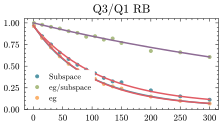

In [25]:
bounds = ([0, 0, 0], [1, np.inf, np.inf])

cut = slice(0, 200)

popt_13, pcov = opt.curve_fit(fit, x_rb_13[cut], popln_subspace_avg_13[cut], sigma=popln_subspace_err_13[cut], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_13 = np.sqrt(np.diag(pcov))

popt2_13, pcov2 = opt.curve_fit(fit, x_rb_13[cut], popln_eg_renorm_13[cut], p0=[0.8, 0.01, 0.01], sigma=popln_eg_renorm_err_13[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr2_13 = np.sqrt(np.diag(pcov2))

if len(state_erasure) > 0:
    popt3_13, pcov3 = opt.curve_fit(fit, x_rb_13[cut], popln_not_erase_13[cut], p0=[0.8, 0.01, 0.01], sigma=popln_not_erase_err_13[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
    perr3_13 = np.sqrt(np.diag(pcov3))
else:
    popt3_13 = None
    perr3_13 = None

# Alternative to fitting eg/subspace: fit to double exponential "survival probability"
popt4_13, pcov4 = meas.fitting.fitrb_l1_l2(x_rb_13, popln_eg_13, p1=popt_13[0], sigma=popln_eg_err_13)
perr4_13 = np.sqrt(np.diag(pcov4))

# Alternative to fitting eg/subspace: fit to single exponential "survival probability"
popt5_13, pcov5 = opt.curve_fit(fit, x_rb_13, popln_eg_13, sigma=popln_eg_err_13, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr5_13 = np.sqrt(np.diag(pcov5))

x_rb_fit_13 = np.linspace(0, np.max(x_rb_13), 1000)
y_fit_pop_13 = fit(x_rb_fit_13, *popt_13)
y_fit_leak_13 = fit(x_rb_fit_13, *popt2_13)
y_fit_surv_13 = meas.fitting.rb_decay_l1_l2(x_rb_fit_13, popt_13[0], *popt4_13)
y_fit_surv_single_13 = fit(x_rb_fit_13, *popt5_13)

if len(state_erasure) > 0:
    y_fit_erase_13 = fit(x_rb_fit_13, *popt3_13)
else:
    y_fit_erase_13 = None

plt.figure()
plt.title("Q3/Q1 RB")
plt.plot(x_rb_13, popln_subspace_avg_13, 'o', label='Subspace')
plt.plot(x_rb_fit_13, y_fit_pop_13)
plt.plot(x_rb_13, popln_eg_renorm_13, 'o', label='eg/subspace')
plt.plot(x_rb_fit_13, y_fit_leak_13)
plt.plot(x_rb_13, popln_eg_13, 'o', label='eg')
plt.plot(x_rb_fit_13, y_fit_surv_13)
plt.plot(x_rb_fit_13, y_fit_surv_single_13)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1.05)
# log scale 
plt.show()

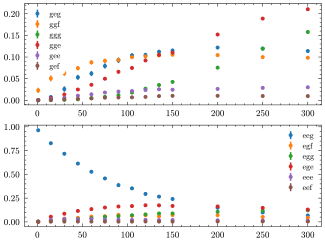

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(5, 4))

# define a color list for the differen

color_list = []

# use tab10 color map

color_list = plt.cm.tab10(np.linspace(0, 1, 10))

# for state in state_name_str:
#     color_list.append('C'+str(state_name_str.index(state)))



[ax[0].errorbar(x_rb_13, pop_dict_13['avg'][state], yerr=z*pop_dict_13['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_g)]


[ax[1].errorbar(x_rb_13, pop_dict_13['avg'][state], yerr=z*pop_dict_13['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_e)] 

ax[0].legend()
ax[1].legend()





IRB Q3/Q1

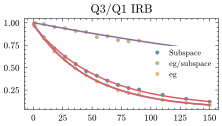

In [27]:
bounds = ([0, 0, 0], [1, np.inf, np.inf])
cut = slice(0, 100)

# popt_x_13, pcov = opt.curve_fit(fit, x_rb_x_13[cut], popln_subspace_avg_x_13[cut], sigma=popln_subspace_err_x_13[cut], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
popt_x_13, pcov = opt.curve_fit(fit, x_rb_x_13, popln_subspace_avg_x_13, sigma=popln_subspace_err_x_13, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_x_13 = np.sqrt(np.diag(pcov))

popt2_x_13, pcov2 = opt.curve_fit(fit, x_rb_x_13[cut], popln_eg_renorm_x_13[cut], p0=[0.8, 0.01, 0.01], sigma=popln_eg_renorm_err_x_13[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr2_x_13 = np.sqrt(np.diag(pcov2))

if len(state_erasure) > 0:
    popt3_x_13, pcov3 = opt.curve_fit(fit, x_rb_x_13[cut], popln_not_erase_x_13[cut], p0=[0.8, 0.01, 0.01], sigma=popln_not_erase_err_x_13[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
    perr3_x_13 = np.sqrt(np.diag(pcov3))
else:
    popt3_x_13 = None
    perr3_x_13 = None

# Alternative to fitting eg/subspace: fit to double exponential "survival probability"
popt4_x_13, pcov4 = meas.fitting.fitrb_l1_l2(x_rb_x_13, popln_eg_x_13, p1=popt_x_13[0], sigma=popln_eg_err_x_13)
perr4_x_13 = np.sqrt(np.diag(pcov4))

# Alternative to fitting eg/subspace: fit to single exponential "survival probability"
popt5_x_13, pcov5 = opt.curve_fit(fit, x_rb_x_13, popln_eg_x_13, sigma=popln_eg_err_x_13, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr5_x_13 = np.sqrt(np.diag(pcov5))

x_rb_fit_x_13 = np.linspace(0, np.max(x_rb_x_13), 1000)
y_fit_pop_x_13 = fit(x_rb_fit_x_13, *popt_x_13)
y_fit_leak_x_13 = fit(x_rb_fit_x_13, *popt2_x_13)
y_fit_surv_x_13 = meas.fitting.rb_decay_l1_l2(x_rb_fit_x_13, popt_x_13[0], *popt4_x_13)
y_fit_surv_single_x_13 = fit(x_rb_fit_x_13, *popt5_x_13)

if len(state_erasure) > 0:
    y_fit_erase_x_13 = fit(x_rb_fit_x_13, *popt3_x_13)
else:
    y_fit_erase_x_13 = None

plt.figure()
plt.title("Q3/Q1 IRB")
plt.plot(x_rb_x_13, popln_subspace_avg_x_13, 'o', label='Subspace')
plt.plot(x_rb_fit_x_13, y_fit_pop_x_13)
plt.plot(x_rb_x_13, popln_eg_renorm_x_13, 'o', label='eg/subspace')
plt.plot(x_rb_fit_x_13, y_fit_leak_x_13)
plt.plot(x_rb_x_13, popln_eg_x_13, 'o', label='eg')
plt.plot(x_rb_fit_x_13, y_fit_surv_x_13)
plt.plot(x_rb_fit_x_13, y_fit_surv_single_x_13)
plt.legend()
plt.tight_layout()
plt.show()

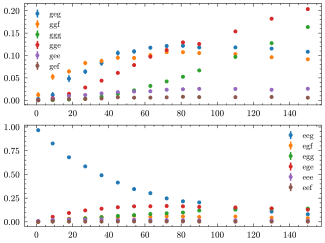

In [28]:

fig, ax = plt.subplots(2, 1, figsize=(5, 4))

# define a color list for the differen

color_list = []

# use tab10 color map

color_list = plt.cm.tab10(np.linspace(0, 1, 10))

# for state in state_name_str:
#     color_list.append('C'+str(state_name_str.index(state)))



[ax[0].errorbar(x_rb_x_13, pop_dict_x_13['avg'][state], yerr=z*pop_dict_x_13['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_g)]


[ax[1].errorbar(x_rb_x_13, pop_dict_x_13['avg'][state], yerr=z*pop_dict_x_13['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_e)] 

ax[0].legend()
ax[1].legend()



RB Q2/Q1

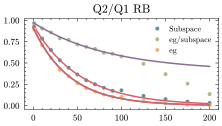

In [29]:
bounds = ([0, 0, 0], [1, np.inf, np.inf])

cut = slice(0, 10)
# cut = slice(0, 100)

popt_12, pcov = opt.curve_fit(fit, x_rb_12[cut], popln_subspace_avg_12[cut], sigma=popln_subspace_err_12[cut], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
# popt_12, pcov = opt.curve_fit(fit, x_rb_12, popln_subspace_avg_12, sigma=popln_subspace_err_12, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_12 = np.sqrt(np.diag(pcov))

popt2_12, pcov2 = opt.curve_fit(fit, x_rb_12[cut], popln_eg_renorm_12[cut], p0=[0.8, 0.01, 0.01], sigma=popln_eg_renorm_err_12[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr2_12 = np.sqrt(np.diag(pcov2))

if len(state_erasure) > 0:
    popt3_12, pcov3 = opt.curve_fit(fit, x_rb_12[cut], popln_not_erase_12[cut], p0=[0.8, 0.01, 0.01], sigma=popln_not_erase_err_12[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
    perr3_12 = np.sqrt(np.diag(pcov3))
else:
    popt3_12 = None
    perr3_12 = None

# Alternative to fitting eg/subspace: fit to double exponential "survival probability"
popt4_12, pcov4 = meas.fitting.fitrb_l1_l2(x_rb_12, popln_eg_12, p1=popt_12[0], sigma=popln_eg_err_12)
perr4_12 = np.sqrt(np.diag(pcov4))

# Alternative to fitting eg/subspace: fit to single exponential "survival probability"
popt5_12, pcov5 = opt.curve_fit(fit, x_rb_12, popln_eg_12, sigma=popln_eg_err_12, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr5_12 = np.sqrt(np.diag(pcov5))

x_rb_fit_12 = np.linspace(0, np.max(x_rb_12), 1000)
y_fit_pop_12 = fit(x_rb_fit_12, *popt_12)
y_fit_leak_12 = fit(x_rb_fit_12, *popt2_12)
y_fit_surv_12 = meas.fitting.rb_decay_l1_l2(x_rb_fit_12, popt_12[0], *popt4_12)
y_fit_surv_single_12 = fit(x_rb_fit_12, *popt5_12)

if len(state_erasure) > 0:
    y_fit_erase_12 = fit(x_rb_fit_12, *popt3_12)
else:
    y_fit_erase_12 = None

plt.figure()
plt.title("Q2/Q1 RB")
plt.plot(x_rb_12, popln_subspace_avg_12, 'o', label='Subspace')
plt.plot(x_rb_fit_12, y_fit_pop_12)
plt.plot(x_rb_12, popln_eg_renorm_12, 'o', label='eg/subspace')
plt.plot(x_rb_fit_12, y_fit_leak_12)
plt.plot(x_rb_12, popln_eg_12, 'o', label='eg')
plt.plot(x_rb_fit_12, y_fit_surv_12)
plt.plot(x_rb_fit_12, y_fit_surv_single_12)
plt.legend()
plt.tight_layout()
plt.show()

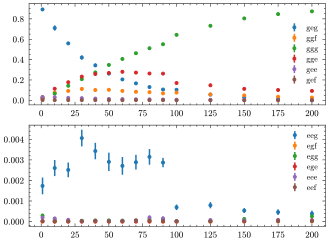

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(5, 4))

# define a color list for the differen

color_list = []

# use tab10 color map

color_list = plt.cm.tab10(np.linspace(0, 1, 10))

# for state in state_name_str:
#     color_list.append('C'+str(state_name_str.index(state)))



[ax[0].errorbar(x_rb_12, pop_dict_12['avg'][state], yerr=z*pop_dict_12['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_g)]


[ax[1].errorbar(x_rb_12, pop_dict_12['avg'][state], yerr=z*pop_dict_12['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_e)] 

ax[0].legend()
ax[1].legend()



IRB Q2/Q1

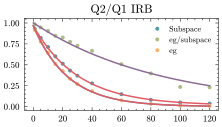

In [31]:
bounds = ([0, 0, 0], [1, np.inf, np.inf])
cut = slice(0, 100)

# popt_x_12, pcov = opt.curve_fit(fit, x_rb_x_12[cut], popln_subspace_avg_x_12[cut], sigma=popln_subspace_err_x_12[cut], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
popt_x_12, pcov = opt.curve_fit(fit, x_rb_x_12, popln_subspace_avg_x_12, sigma=popln_subspace_err_x_12, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_x_12 = np.sqrt(np.diag(pcov))

popt2_x_12, pcov2 = opt.curve_fit(fit, x_rb_x_12[cut], popln_eg_renorm_x_12[cut], p0=[0.8, 0.01, 0.01], sigma=popln_eg_renorm_err_x_12[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr2_x_12 = np.sqrt(np.diag(pcov2))

if len(state_erasure) > 0:
    popt3_x_12, pcov3 = opt.curve_fit(fit, x_rb_x_12[cut], popln_not_erase_x_12[cut], p0=[0.8, 0.01, 0.01], sigma=popln_not_erase_err_x_12[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
    perr3_x_12 = np.sqrt(np.diag(pcov3))
else:
    popt3_x_12 = None
    perr3_x_12 = None

# Alternative to fitting eg/subspace: fit to double exponential "survival probability"
popt4_x_12, pcov4 = meas.fitting.fitrb_l1_l2(x_rb_x_12, popln_eg_x_12, p1=popt_x_12[0], sigma=popln_eg_err_x_12)
perr4_x_12 = np.sqrt(np.diag(pcov4))

# Alternative to fitting eg/subspace: fit to single exponential "survival probability"
popt5_x_12, pcov5 = opt.curve_fit(fit, x_rb_x_12, popln_eg_x_12, sigma=popln_eg_err_x_12, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr5_x_12 = np.sqrt(np.diag(pcov5))

x_rb_fit_x_12 = np.linspace(0, np.max(x_rb_x_12), 1000)
y_fit_pop_x_12 = fit(x_rb_fit_x_12, *popt_x_12)
y_fit_leak_x_12 = fit(x_rb_fit_x_12, *popt2_x_12)
y_fit_surv_x_12 = meas.fitting.rb_decay_l1_l2(x_rb_fit_x_12, popt_x_12[0], *popt4_x_12)
y_fit_surv_single_x_12 = fit(x_rb_fit_x_12, *popt5_x_12)

if len(state_erasure) > 0:
    y_fit_erase_x_12 = fit(x_rb_fit_x_12, *popt3_x_12)
else:
    y_fit_erase_x_12 = None

plt.figure()
plt.title("Q2/Q1 IRB")
plt.plot(x_rb_x_12, popln_subspace_avg_x_12, 'o', label='Subspace')
plt.plot(x_rb_fit_x_12, y_fit_pop_x_12)
plt.plot(x_rb_x_12, popln_eg_renorm_x_12, 'o', label='eg/subspace')
plt.plot(x_rb_fit_x_12, y_fit_leak_x_12)
plt.plot(x_rb_x_12, popln_eg_x_12, 'o', label='eg')
plt.plot(x_rb_fit_x_12, y_fit_surv_x_12)
plt.plot(x_rb_fit_x_12, y_fit_surv_single_x_12)
plt.legend()
plt.tight_layout()
plt.show()

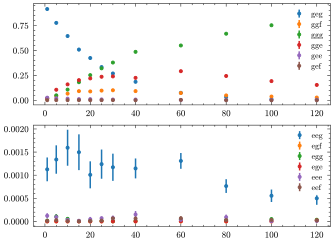

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(5, 4))

# define a color list for the differen

color_list = []

# use tab10 color map

color_list = plt.cm.tab10(np.linspace(0, 1, 10))

# for state in state_name_str:
#     color_list.append('C'+str(state_name_str.index(state)))



[ax[0].errorbar(x_rb_x_12, pop_dict_x_12['avg'][state], yerr=z*pop_dict_x_12['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_g)]


[ax[1].errorbar(x_rb_x_12, pop_dict_x_12['avg'][state], yerr=z*pop_dict_x_12['err'][state],
                fmt='o', label=state, color=color_list[idx]) for idx, state in enumerate(switch_e)] 

ax[0].legend()
ax[1].legend()

### Process the fits

In [111]:
avg_X_per_clifford = 2.167 / 2 # got this by counting the average number of X/2's per Clifford gate in the group, divide by 2
print(avg_X_per_clifford)

1.0835


In [117]:
def get_errors(
    popt, popt2, popt3, popt4, popt5,
    perr, perr2, perr3, perr4, perr5,
    popt_x, popt2_x, popt3_x, popt4_x, popt5_x,
    perr_x, perr2_x, perr3_x, perr4_x, perr5_x,
    d=2,
    get_p2_from=0, # process using 0. popt2, 1. popt4, 2. popt5 for the lambda2 value
    second_method=False):

    lambda1 = popt[0]
    A = popt[2]
    lambda2 = [popt2[0], popt4[3], popt5[0]][get_p2_from]
    lambda2_err = [perr2[0], perr4[3], perr5[0]][get_p2_from]
    L = (1 - A)*(1 - lambda1)
    Lerr = L*np.sqrt((perr[2]/(1 - A))**2 + (perr[0]/(1 - lambda1))**2)

    if popt3 is not None:
        p3 = popt3[0]
        erase = (1 - popt3[2])*(1 - popt3[0])
        erase_err  = erase*np.sqrt((perr3[2]/(1 - popt3[2]))**2 + (perr3[0]/(1 - popt3[0]))**2)
    else:
        erase = 0
        erase_err = 0

    if popt_x is not None:
        lambda1_x = popt_x[0]
        A_x = popt_x[2]
        lambda2_x = [popt2_x[0], popt4_x[3], popt5_x[0]][get_p2_from]
        lambda2_x_err = [perr2_x[0], perr4_x[3], perr5_x[0]][get_p2_from]
    
    if second_method:
        print('Using second method')
        print('lambda2', lambda2)
        print('lambda1', lambda1)
        if popt_x is not None:
            print('lambda2_x', lambda2_x)
            print('lambda1_x', lambda1_x)
        
        print('err leak free:', (1 - (1/d) * ((d-1)*lambda2 + 1))*100)
        print('err err leak free:', (np.sqrt((d-1)**2 / d**2 * lambda2_err**2))*100)
        
        
        lambda2 = lambda2*lambda1
        print('lambda2', lambda2)

        if popt_x is not None:
            lambda2_x = lambda2_x*lambda1_x
            print('lambda2_x', lambda2_x)
        
        lambda2_err = lambda2*np.sqrt((lambda2_err/lambda2)**2 + (perr[0]/lambda1)**2)

        if popt_x is not None:
            lambda2_x_err = lambda2_x*np.sqrt((lambda2_x_err/lambda2_x)**2 + (perr_x[0]/lambda1_x)**2)
    
    if popt_x is not None:
        L_int = (1 - A_x)*(1 - lambda1_x)
        Lerr_x = L_int*np.sqrt((perr_x[2]/(1 - A_x))**2 + (perr_x[0]/(1 - lambda1_x))**2)

        if popt3_x is not None:
            p3_x = popt3_x[0]
            erase_x = (1 - popt3_x[2])*(1 - popt3_x[0])
            erase_err_x = erase_x*np.sqrt((perr3_x[2]/(1 - popt3_x[2]))**2 + (perr3_x[0]/(1 - popt3_x[0]))**2)
        else:
            erase_x = 0
            erase_err_x = 0 

    if get_p2_from != 2:
        print('p2 from:', get_p2_from)
        err = 1 - (1/d) * ((d-1)*lambda2 + 1-L) # this is the RB error with a leakage contribution
        err_err = np.sqrt((d-1)**2 / d**2 * lambda2_err**2 + Lerr**2 / d**2)

        if popt_x is not None:
            err_int = 1 - (1/d) * ((d-1)*lambda2_x + 1-L_int)
            err_int_err = np.sqrt((d-1)**2 / d**2 * lambda2_x_err**2 + Lerr_x**2 / d**2)
    else: # for fitting the eg directly, leakage is accounted for in the error already?
        print('p2 from:', get_p2_from)
        err = 1 - (1/d) * ((d-1)*lambda2 + 1 - L) # this is the RB error with a leakage contribution
        err_err = np.sqrt((d-1)**2 / d**2 * lambda2_err**2 + Lerr**2 / d**2)

        if popt_x is not None:
            err_int = 1 - (1/d) * ((d-1)*lambda2_x + 1 - L_int)
            err_int_err = np.sqrt((d-1)**2 / d**2 * lambda2_x_err**2 + Lerr_x**2 / d**2)
        
        # err_int_err = (d-1) / d * lambda2_x_err

    if popt_x is None:
        results_dict = dict(
            err=err,
            err_err=err_err,
            L=L,
            Lerr=Lerr,
            erase=erase,
            erase_err=erase_err,
        ) 
        return results_dict
        
    err_X = 1 - (1 - err_int) / (1 - err)
    # err_bound1 = (d-1)*(np.abs(lambda2 - lambda2_x/lambda2) + (1 - lambda2))/d
    # err_bound2 = 2*(d**2 - 1)*(1 - lambda2)/(lambda2*d**2) + 4*np.sqrt((1 - lambda2)*(d**2 - 1)/d)
    # err_X_err = np.min([err_bound1, err_bound2])
    err_X_err = np.sqrt((err_int_err**2/(1-err)**2) + (1/(err-1) - (err-err_int)/(1-err)**2)**2 * err_err**2)

    L_tot = 1 - (1 - L_int) / (1 - L)
    erase_tot = 1 - (1 - erase_x)*(1 - erase)

    L_tot_err = np.sqrt(Lerr_x**2/(1 - L)**2 + Lerr**2*L_int**2/(1 - L)**4)

    erase_tot_err = np.sqrt(erase_err_x**2/(1 - erase)**2 + erase_err**2*erase_x**2/(1 - erase)**4)

    err_tot = err_X
    err_tot_err = err_X_err

    F = 1 - err_tot  
    F_err = err_tot_err

    results_dict = dict(
        err=err,
        err_err=err_err,

        err_X=err_X,
        err_X_err=err_X_err,

        err_int=err_int,
        err_int_err=err_int_err,

        L=L,
        Lerr=Lerr,

        L_int=L_int,
        Lerr_x=Lerr_x,

        L_tot=L_tot,
        L_tot_err=L_tot_err,

        erase=erase,
        erase_err=erase_err,
        
        erase_x=erase_x,
        erase_err_x=erase_err_x,

        erase_tot=erase_tot,
        erase_tot_err=erase_tot_err,
        F=F,
        F_err=F_err,
    )
    return results_dict

In [35]:
get_p2_from = 2
second_method = True

In [109]:
results_12 = get_errors(
    popt_12, popt2_12, popt3_12, popt4_12, popt5_12,
    perr_12, perr2_12, perr3_12, perr4_12, perr5_12,
    popt_x_12, popt2_x_12, popt3_x_12, popt4_x_12, popt5_x_12,
    perr_x_12, perr2_x_12, perr3_x_12, perr4_x_12, perr5_x_12,
    get_p2_from=get_p2_from,second_method=second_method
)

print("All values in percent")
print("Q2/Q1")
# print('Error reference per X: %.3f +/- %.3f' % (results_12['err'] / avg_X_per_clifford*100, results_12['err_err'] / avg_X_per_clifford*100))
# print('Error interleaved per X: %.3f +/- %.3f' % (results_12['err_X'] / (avg_X_per_clifford+1)*100, results_12['err_X_err'] / (avg_X_per_clifford+1)*100))
# print('Leakage error from reference per X: %.3f +/- %.3f' % (results_12['L'] / avg_X_per_clifford*100, results_12['Lerr'] / avg_X_per_clifford*100))
# print('Leakage error from interleaved per X: %.3f +/- %.3f' % (results_12['L_int'] / avg_X_per_clifford*100, results_12['Lerr_x'] / avg_X_per_clifford*100))
# print('Erasure from reference: %.3f +/- %.3f' % (results_12['erase'] / avg_X_per_clifford*100, results_12['erase_err'] / avg_X_per_clifford*100))
# print('Erasure from interleaved: %.3f +/- %.3f' % (results_12['erase_x'] / avg_X_per_clifford*100, results_12['erase_err_x'] / avg_X_per_clifford*100))

print('Error reference per X (total error per clifford): %.3f +/- %.3f' % (results_12['err']*100, results_12['err_err'] *100))
print('Error per X (the total error per X = 1 - F): %.3f +/- %.3f' % (results_12['err_X']*100, results_12['err_X_err'] *100))
print('Leakage error from reference per X: %.3f +/- %.3f' % (results_12['L']*100, results_12['Lerr'] *100))
print('Leakage error from interleaved per X: %.3f +/- %.3f' % (results_12['L_int']*100, results_12['Lerr_x'] *100))
print('Erasure from reference: %.3f +/- %.3f' % (results_12['erase']*100, results_12['erase_err'] *100))
print('Erasure from interleaved: %.3f +/- %.3f' % (results_12['erase_x']*100, results_12['erase_err_x'] *100))
print('Leakage per swap overall: %.3f +/- %.3f' % (results_12['L_tot']*100, results_12['L_tot_err']*100))
print('Erasure per swap overall: %.3f +/- %.3f' %(results_12['erase_tot']*100, results_12['erase_tot_err']*100))
print('Fidelity:', 100*results_12['F'], '+/-', results_12['F_err']*100)  

Using second method
lambda2 0.9762297821120398
lambda2_x 0.9583380176240255
lambda1 0.9811743780268293
lambda1_x 0.9678077408576984
err leak free: 1.1885108943980094
err err leak free: 0.010755733647276326
lambda2 0.9578516492750477
lambda2_x 0.9274869518147533
p2 from: 2
All values in percent
Q2/Q1
Error reference per X (total error per clifford): 3.046 +/- 0.045
Error per X (the total error per X = 1 - F): 2.235 +/- 0.054
Leakage error from reference per X: 1.877 +/- 0.065
Leakage error from interleaved per X: 3.174 +/- 0.031
Erasure from reference: 0.000 +/- 0.000
Erasure from interleaved: 0.000 +/- 0.000
Leakage per swap overall: 1.321 +/- 0.031
Erasure per swap overall: 0.000 +/- 0.000
Fidelity: 97.76540335719366 +/- 0.054382595183851065


In [110]:
results_13 = get_errors(
    popt_13, popt2_13, popt3_13, popt4_13, popt5_13,
    perr_13, perr2_13, perr3_13, perr4_13, perr5_13,
    popt_x_13, popt2_x_13, popt3_x_13, popt4_x_13, popt5_x_13,
    perr_x_13, perr2_x_13, perr3_x_13, perr4_x_13, perr5_x_13,
    get_p2_from=get_p2_from,second_method=second_method
)

print("All values in percent")
print("Q3/Q1")
print('Error reference (total error per clifford): %.3f +/- %.3f' % (results_13['err']*100, results_13['err_err']*100))
print('Error per X (total error per X = 1-F): %.3f +/- %.3f' % (results_13['err_X']*100, results_13['err_X_err']*100))
print('Leakage error from reference: %.3f +/- %.3f' % (results_13['L']*100, results_13['Lerr']*100))
print('Leakage error from interleaved: %.3f +/- %.3f' % (results_13['L_int']*100, results_13['Lerr_x']*100))
print('Erasure from reference: %.3f +/- %.3f' % (results_13['erase']*100, results_13['erase_err']*100))
print('Erasure from interleaved: %.3f +/- %.3f' % (results_13['erase_x']*100, results_13['erase_err_x']*100))
print('Leakage per swap overall: %.3f +/- %.3f' % (results_13['L_tot']*100, results_13['L_tot_err']*100))
print('Erasure per swap overall: %.3f +/- %.3f' %(results_13['erase_tot']*100, results_13['erase_tot_err']*100))
print('Fidelity:', 100*results_13['F'], '+/-', results_13['F_err']*100)  

Using second method
lambda2 0.9896539333580796
lambda2_x 0.9796001799687881
lambda1 0.9913175060137108
lambda1_x 0.9822559036036229
err leak free: 0.5173033320960196
err err leak free: 0.00852104974612012
lambda2 0.9810612690331907
lambda2_x 0.9622180599455136
p2 from: 2
All values in percent
Q3/Q1
Error reference (total error per clifford): 1.360 +/- 0.010
Error per X (total error per X = 1-F): 1.382 +/- 0.020
Leakage error from reference: 0.826 +/- 0.008
Leakage error from interleaved: 1.669 +/- 0.013
Erasure from reference: 0.000 +/- 0.000
Erasure from interleaved: 0.000 +/- 0.000
Leakage per swap overall: 0.850 +/- 0.013
Erasure per swap overall: 0.000 +/- 0.000
Fidelity: 98.61764321993418 +/- 0.02001924667221665


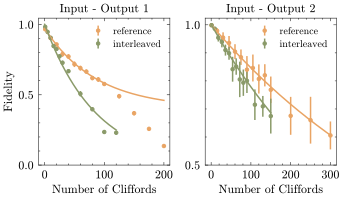

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3))

irb_color = '#8A9A69'
rb_color = '#E9A464'

log_scale = False

data = popln_eg_renorm_12
if log_scale:
    rescale_factor = 0.5/(np.max(data) - np.min(data))
    rescale_baseline = np.min(data)
else:
    rescale_factor = 1
    rescale_baseline = 0

data = popln_eg_renorm_12
data_err = popln_eg_renorm_err_12
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
# print(data, rescale_baseline, rescale_factor)
ax[0].errorbar(x_rb_12, rescaled_y, yerr=rescale_factor*data_err, fmt='o', markersize=3.5, label='reference', color=rb_color, linestyle='', zorder=0)
data = popln_eg_renorm_x_12
data_err = popln_eg_renorm_err_x_12
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
# print(data, rescale_baseline, rescale_factor)
ax[0].errorbar(x_rb_x_12, rescaled_y, yerr=rescale_factor*data_err, fmt='o', markersize=3.5, label='interleaved', color=irb_color,
                linestyle='', zorder=0)

ax[0].set_title('Input - Output 1')
if log_scale:
    ax[0].set_yscale('log')

data = y_fit_leak_12
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
ax[0].plot(x_rb_fit_12, rescaled_y, color=rb_color, zorder=1)
data = y_fit_leak_x_12
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
ax[0].plot(x_rb_fit_x_12, rescaled_y, color=irb_color, zorder=1)


data = popln_eg_renorm_13
if log_scale:
    rescale_factor = 0.5/(np.max(data) - np.min(data))
    rescale_baseline = np.min(data)
else:
    rescale_factor = 1
    rescale_baseline = 0

data = popln_eg_renorm_13
data_err = popln_eg_renorm_err_13
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
ax[1].errorbar(x_rb_13, rescaled_y , yerr=z*rescale_factor*data_err, fmt='o', markersize=3.5, label='reference', color=rb_color, linestyle='', zorder=0)
data = popln_eg_renorm_x_13
data_err = popln_eg_renorm_err_x_13
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
ax[1].errorbar(x_rb_x_13, rescaled_y, yerr=z*rescale_factor*data_err, fmt='o', markersize=3.5, label='interleaved', color=irb_color,
                linestyle='', zorder=0)

ax[1].set_title('Input - Output 2')
if log_scale:
    ax[1].set_yscale('log')

data = y_fit_leak_13
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
ax[1].plot(x_rb_fit_13, rescaled_y, color=rb_color, zorder=1)
data = y_fit_leak_x_13
# rescaled_y = (data - rescale_baseline)*rescale_factor + 0.5
rescaled_y = (data - rescale_baseline)*rescale_factor
ax[1].plot(x_rb_fit_x_13, rescaled_y, color=irb_color, zorder=1)

# set yticks

ax[0].set_yticks([0.0, 0.5, 1])
ax[1].set_yticks([0.5, 1])
# for i in range(2):
#     ax[i].set_yticks([0.0, 0.5, 1])
#     # ax[i].set_ylim([0.4, 1.1])
#     ax[i].set_ylim([-0.05, 1.05])


for item in ([ax[0].title, ax[0].xaxis.label, ax[0].yaxis.label] +
             ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    item.set_fontsize(12)


for item in ([ax[1].title, ax[1].xaxis.label, ax[1].yaxis.label] +
             ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    item.set_fontsize(12)

ax[0].set_ylabel('Fidelity')

ax[0].set_xlabel('Number of Cliffords')
ax[1].set_xlabel('Number of Cliffords')

ax[0].legend(fontsize=10, loc='upper right')
ax[1].legend(fontsize=10, loc='upper right')

fig.tight_layout()

fig.savefig('fidelity_q1q2_q1q3.pdf')
fig.savefig('fidelity_q1q2_q1q3.jpg', dpi=300)
fig.savefig('fidelity_q1q2_q1q3.svg')


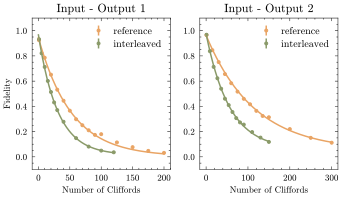

In [39]:
fig2, ax2 = plt.subplots(1, 2, figsize=(5, 3))
# fig3, ax3 = plt.subplots(2, 1, figsize=(4, 3), sharex=True)

ax2[0].errorbar(x_rb_12, popln_subspace_avg_12, yerr=popln_subspace_err_12, fmt='o', label='reference', color=rb_color,
                linestyle='', zorder=0)
ax2[0].errorbar(x_rb_x_12, popln_subspace_avg_x_12, yerr=popln_subspace_err_x_12, fmt='o', label='interleaved', color=irb_color,
                linestyle='', zorder=0)


# ax2[0].errorbar(x_rb_12, popln_eg_renorm_12, yerr=popln_eg_renorm_err_12, fmt='o', markersize=3.5, label='reference', color=rb_color, linestyle='', zorder=0)




# ax2[0].set_yscale('log')

# ax3[0].errorbar(x_rb_12, popln_not_erase_12, yerr=popln_not_erase_err_12, fmt='o', label='Q1-Q3', color='#516c96',
#                 linestyle='', zorder=0)
# ax3[0].errorbar(x_rb_x_12, popln_not_erase_x_12, yerr=popln_not_erase_err_x_12, fmt='o', label='Q1-Q3', color='#9c6a8c',
#                 linestyle='', zorder=0)




ax2[0].plot(x_rb_fit_12, y_fit_pop_12, color=rb_color, zorder=1)
ax2[0].plot(x_rb_fit_x_12, y_fit_pop_x_12, color=irb_color, zorder=1)

# ax3[0].plot(x_rb_fit_12  , y_fit_erase_12, color='black', zorder=1)
# ax3[0].plot(x_rb_fit_x_12, y_fit_erase_x_12, color='black', zorder=1)

ax2[1].errorbar(x_rb_13, popln_subspace_avg_13, yerr=popln_subspace_err_13, fmt='o', label='reference', color=rb_color,linestyle='', zorder=0)


# ax2[1].errorbar(x_rb_13, popln_eg_renorm_13, yerr=popln_eg_renorm_err_13, fmt='o', markersize=3.5, label='reference', color=rb_color, linestyle='', zorder=0)

# ax2[1].set_yscale('log')


ax2[1].errorbar(x_rb_x_13, popln_subspace_avg_x_13, yerr=popln_subspace_err_x_13, fmt='o', label='interleaved', color=irb_color,
                linestyle='', zorder=0)


# ax3[1].errorbar(x_rb_13, popln_not_erase_13, yerr=popln_not_erase_err_13, fmt='o', label='reference', color='#516c96',
#                 linestyle='', zorder=0)

# ax3[1].errorbar(x_rb_x_13, popln_not_erase_x_13, yerr=popln_not_erase_err_x_13, fmt='o', label='interleaved', color='#9c6a8c',
#                 linestyle='', zorder=0)


ax2[1].plot(x_rb_fit_13, y_fit_pop_13, color=rb_color, zorder=1)
ax2[1].plot(x_rb_fit_x_13, y_fit_pop_x_13, color=irb_color, zorder=1)

# ax3[1].plot(x_rb_fit_13, y_fit_erase_13, color='black', zorder=1)
# ax3[1].plot(x_rb_fit_x_13, y_fit_erase_x_13, color='black', zorder=1)


# set yticks

for i in range(2):
    # ax2[i].set_yticks([0, 1.1])
    ax2[i].set_ylim([-0.1, 1.1])
    # ax2[i].hlines(1, 0, 100, linestyle='--', color='black', zorder=1)


ax2[0].set_ylabel('Fidelity')

ax2[0].set_xlabel('Number of Cliffords')
ax2[1].set_xlabel('Number of Cliffords')

ax2[0].legend(fontsize=10, loc='upper right')
ax2[1].legend(fontsize=10, loc='upper right')

ax2[0].set_title('Input - Output 1')
ax2[1].set_title('Input - Output 2')


fig2.tight_layout()


fig2.savefig('leakage_q1q2_q1q3.pdf')
fig2.savefig('leakage_q1q2_q1q3.jpg', dpi=300)
fig2.savefig('leakage_q1q2_q1q3.svg')



In [41]:
# # plot on one panel the subspace and its fit for RB and IRB and on the other panel the eg/(eg+gf) and its fit for RB and IRB

# fig, ax = plt.subplots(1, 2, figsize=(7, 4))



# text_leak = '$L_{ref}$ =' + '{:.3f} $\pm$ {:.3f} %'.format(L*100, Lerr*100) + '\n' + '$L_{int}$ =' + '{:.3f} $\pm$ {:.3f} %'.format(L_x*100, Lerr_x*100) + '\n' + '$L_{tot}$ =' + '{:.3f} $\pm$ {:.3f} %'.format(L_tot*100, L_tot_err*100)

# text_eg = '$r_{cliff}$ =' + '{:.2f} $\pm$ {:.2f} %'.format(err*100, err_err*100) + '\n' + '$r_{int}$ =' + '{:.2f} $\pm$ {:.2f} %'.format(err_int*100, err_int_err*100) + '\n' + '$F_{tot}$ =' + '{:.2f} $\pm$ {:.2f} %'.format(F*100, F_err*100)

# ax[0].text(0.5, 0.1, text_leak, horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
# ax[1].text(0.5, 0.1, text_eg, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

# ax[0].errorbar(np.unique(xpts), popln_subspace_avg, yerr=popln_subspace_std, fmt='o-',
#                 label='Reference', color='#445fab', linestyle='', alpha=0.7)
# ax[0].errorbar(np.unique(xpts_x), popln_subspace_avg_x, yerr=popln_subspace_std_x,
#                 fmt='o-', label='Interlieved', color='#ab4d44', linestyle='', alpha=0.7)

# ax[0].plot(x_rb_fit, y_fit_pop, color='black')
# ax[0].plot(x_fit_rb_x, y_fit_pop_x, color='black')

# ax[1].errorbar(np.unique(xpts), popln_eg_renorm, yerr=popln_eg_renorm_err, fmt='o-', 
#                color='#445fab', alpha=0.7, linestyle='')
# ax[1].errorbar(np.unique(xpts_x), popln_eg_renorm_x, yerr=popln_eg_renorm_err_x, fmt='o-', 
#                color='#ab4d44', alpha=0.7, linestyle='')

# ax[1].plot(x_rb_fit, y_fit_leak, color='black')
# ax[1].plot(x_fit_rb_x, y_fit_leak_x, color='black')



# ax[0].set_ylim([0.1, 1])
# ax[1].set_ylim([0.1, 1])

# ax[0].set_ylabel('Population')
# ax[0].set_xlabel('Number of Clifford')

# ax[1].set_ylabel('Population')
# ax[1].set_xlabel('Number of Clifford')

# ax[0].legend()
# ax[0].set_title('Subspace leakage')
# ax[1].set_title('Subspace fidelity')

# fig.tight_layout()

# fig.savefig('fidelity_q1q3.png', dpi=300)
# fig.savefig('fidelity_q1q3.pdf', dpi=300)

### New figure

In [40]:
# used to make the save plot filename
full_filenames = [
    # "S:/QRAM/qram_4QR2/data/data_250119//00007_00008_merged_rb_EgGf_qubit31.npz",
    "S:/QRAM/qram_4QR2/data/data_250119//00014_00015_merged_rb_EgGf_qubit31.npz",
    "S:/QRAM/qram_4QR2/data/data_250119//00004_00005_merged_rb_EgGf_qubit21.npz",
    # "S:/QRAM/qram_4QR2/data/data_250119//00010_00011_merged_rb_EgGf_qubit31.npz",
    "S:/QRAM/qram_4QR2/data/data_250119//00016_00017_merged_rb_EgGf_qubit31.npz",
    "S:/QRAM/qram_4QR2/data/data_250119//00006_00007_merged_rb_EgGf_qubit21.npz"
]

full_filenames[0][-6:-4]

'31'

In [41]:
popt_eg_12, pcov = opt.curve_fit(fit, x_rb_12, pop_dict_12['avg']['geg'], sigma=pop_dict_12['err']['geg'], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_eg_12 = np.sqrt(np.diag(pcov))

popt_eg_x_12, pcov = opt.curve_fit(fit, x_rb_x_12, pop_dict_x_12['avg']['geg'], sigma=pop_dict_x_12['err']['geg'], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_eg_x_12 = np.sqrt(np.diag(pcov))

popt_eg_13, pcov = opt.curve_fit(fit, x_rb_13, pop_dict_13['avg']['eeg'], sigma=pop_dict_13['err']['eeg'], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_eg_13 = np.sqrt(np.diag(pcov))

popt_eg_x_13, pcov = opt.curve_fit(fit, x_rb_x_13, pop_dict_x_13['avg']['eeg'], sigma=pop_dict_x_13['err']['geg'], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_eg_x_13 = np.sqrt(np.diag(pcov))



In [42]:
color_eg = '#386641'
color_subspace = '#6a994e'
color_post = '#a7c957'

rb popln geg 12 [0.89281456 0.71000072 0.55926209 0.42043346 0.34341553 0.26245887
 0.20535902 0.16645422 0.13024018 0.106021   0.10349106 0.05598517
 0.02828317 0.01218762 0.0042838 ]
irb popln geg 12 [0.91681574 0.7777137  0.64543607 0.50953068 0.42465979 0.33362326
 0.26956426 0.18567472 0.07511777 0.03222313 0.01158405 0.00827784]
rb\rb_irb_00014_00015_31_00004_00005_21_00016_00017_31_00006_00007_21
Saved svg plot S:\QRAM\qram_4QR2\plots\paper\rb\rb_irb_00014_00015_31_00004_00005_21_00016_00017_31_00006_00007_21.svg
Saved pdf plot S:\QRAM\qram_4QR2\plots\paper\rb\rb_irb_00014_00015_31_00004_00005_21_00016_00017_31_00006_00007_21.pdf


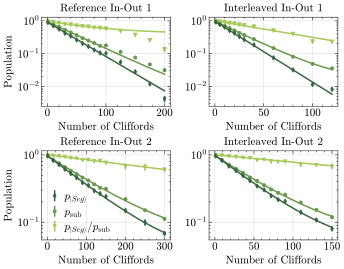

In [76]:
darkmode = False

plt.style.use('default') # need to set this first to reset out of dark mode
plt.style.use('S:\Connie\prx.mplstyle')
if darkmode: plt.style.use('dark_background')

fig3, ax3 = plt.subplots(2, 2, figsize=(5, 4.0), sharey=False)
plt.subplots_adjust(hspace=0.5) 
plt.subplots_adjust(wspace=0.3) 

labelsize = 11

ax3[0, 0].errorbar(x_rb_12,  pop_dict_12['avg']['geg'], yerr=z*pop_dict_12['err']['geg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
print("rb popln geg 12", pop_dict_12['avg']['geg'])
ax3[0, 0].errorbar(x_rb_12, popln_subspace_avg_12, yerr=z*popln_subspace_err_12, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
ax3[0, 0].errorbar(x_rb_12, popln_eg_renorm_12, yerr=z*popln_eg_renorm_err_12, fmt='v', markersize=3.5, label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post, linestyle='', zorder=0)
# ax3[0, 0].errorbar(x_rb_12,  pop_dict_12['avg']['ggf'], yerr=z*pop_dict_12['err']['ggf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[0, 0].plot(x_rb_fit_12, fit(x_rb_fit_12, *popt_eg_12),  color=color_eg)
ax3[0, 0].plot(x_rb_fit_12, y_fit_pop_12, color=color_subspace, zorder=1)
ax3[0, 0].plot(x_rb_fit_12, y_fit_leak_12, color=color_post, zorder=1)
ax3[0, 0].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)


ax3[0, 1].errorbar(x_rb_x_12,  pop_dict_x_12['avg']['geg'], yerr=z*pop_dict_x_12['err']['geg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
ax3[0, 1].errorbar(x_rb_x_12, popln_subspace_avg_x_12, yerr=z*popln_subspace_err_x_12, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
print("irb popln geg 12", pop_dict_x_12['avg']['geg'])
# ax3[1, 0].errorbar(x_rb_x_12,  pop_dict_x_12['avg']['ggf'], yerr=z*pop_dict_x_12['err']['ggf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[0, 1].errorbar(x_rb_x_12, popln_eg_renorm_x_12, yerr=z*popln_eg_renorm_err_x_12, fmt='v', markersize=3.5, label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post, linestyle='', zorder=0)
ax3[0, 1].plot(x_rb_fit_x_12, fit(x_rb_fit_x_12, *popt_eg_x_12),  color=color_eg)
ax3[0, 1].plot(x_rb_fit_x_12, y_fit_pop_x_12, color=color_subspace, zorder=1)
ax3[0, 1].plot(x_rb_fit_x_12, y_fit_leak_x_12, color=color_post, zorder=1)
ax3[0, 1].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)

ax3[1, 0].errorbar(x_rb_13,  pop_dict_13['avg']['eeg'], yerr=z*pop_dict_13['err']['eeg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
ax3[1, 0].errorbar(x_rb_13, popln_subspace_avg_13, yerr=z*popln_subspace_err_13, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
# ax3[0, 1].errorbar(x_rb_13,  pop_dict_13['avg']['egf'], yerr=z*pop_dict_13['err']['egf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[1, 0].errorbar(x_rb_13, popln_eg_renorm_13, yerr=z*popln_eg_renorm_err_13, fmt='v', label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post,
                linestyle='', zorder=0)
ax3[1, 0].plot(x_rb_fit_13, fit(x_rb_fit_13, *popt_eg_13),  color=color_eg)
ax3[1, 0].plot(x_rb_fit_13, y_fit_pop_13, color=color_subspace, zorder=1)
ax3[1, 0].plot(x_rb_fit_13, y_fit_leak_13, color=color_post, zorder=1)
# ax3[1, 0].sharex(ax3[0, 0])
ax3[1, 0].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)

ax3[1, 1].errorbar(x_rb_x_13,  pop_dict_x_13['avg']['eeg'], yerr=z*pop_dict_x_13['err']['eeg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
ax3[1, 1].errorbar(x_rb_x_13, popln_subspace_avg_x_13, yerr=z*popln_subspace_err_x_13, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
# ax3[1, 1].errorbar(x_rb_x_13,  pop_dict_x_13['avg']['egf'], yerr=z*pop_dict_x_13['err']['egf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[1, 1].errorbar(x_rb_x_13, popln_eg_renorm_x_13, yerr=z*popln_eg_renorm_err_x_13, fmt='v', label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post,
                linestyle='', zorder=0)
ax3[1, 1].plot(x_rb_fit_x_13, fit(x_rb_fit_x_13, *popt_eg_x_13),  color=color_eg)
ax3[1, 1].plot(x_rb_fit_x_13, y_fit_pop_x_13, color=color_subspace, zorder=1)
ax3[1, 1].plot(x_rb_fit_x_13, y_fit_leak_x_13, color=color_post, zorder=1)
# ax3[1, 1].sharex(ax3[0, 1])
ax3[1, 1].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)


# ax3[0].errorbar(x_rb_x_12, popln_subspace_avg_x_12, yerr=z*popln_subspace_err_x_12, fmt='o', label='interleaved', color=irb_color,
#                 linestyle='', zorder=0)


scale = 'log'

plt.sca(ax3[0, 0])
plt.grid(color='k', alpha=0.2)
ax3[0, 0].set_yscale(scale)
ax3[0, 0].set_xticks([0, 100, 200])
ax3[0, 0].set_yticks([1, 1e-1, 1e-2])
ax3[0, 0].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

plt.sca(ax3[1, 0])
plt.grid(color='k', alpha=0.2)
ax3[1, 0].set_yscale(scale)
ax3[1, 0].set_xticks([0, 100, 200, 300])
ax3[1, 0].set_yticks([1, 1e-1])
ax3[1, 0].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

plt.sca(ax3[0, 1])
plt.grid(color='k', alpha=0.2)
ax3[0, 1].set_yscale(scale)
ax3[0, 1].set_xticks([0, 50, 100])
ax3[0, 1].sharey(ax3[0, 0])
ax3[0, 1].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

plt.sca(ax3[1, 1])
plt.grid(color='k', alpha=0.2)
ax3[1, 1].set_yscale(scale)
ax3[1, 1].set_xticks([0, 50, 100, 150])
ax3[1, 1].sharey(ax3[1, 0])
ax3[1, 1].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

ax3[0, 0].set_title('Reference In-Out 1', fontsize=labelsize)
ax3[1, 0].set_title('Reference In-Out 2', fontsize=labelsize)
ax3[0, 1].set_title('Interleaved In-Out 1', fontsize=labelsize)
ax3[1, 1].set_title('Interleaved In-Out 2', fontsize=labelsize)

ax3[0, 0].set_ylabel('Population', fontsize=labelsize)
# ax3[0, 1].set_ylabel('Population', fontsize=labelsize)
ax3[1, 0].set_ylabel('Population', fontsize=labelsize)
# ax3[1, 1].set_ylabel('Population', fontsize=labelsize)

ax3[0, 0].set_xlabel('Number of Cliffords', fontsize=labelsize)
ax3[0, 1].set_xlabel('Number of Cliffords', fontsize=labelsize)
ax3[1, 0].set_xlabel('Number of Cliffords', fontsize=labelsize)
ax3[1, 1].set_xlabel('Number of Cliffords', fontsize=labelsize)

# ax3[0, 0].legend(fontsize=labelsize, loc='lower left', frameon=False)
# ax3[0, 1].legend(fontsize=labelsize, loc='upper right', frameon=False)
ax3[1, 0].legend(fontsize=labelsize, loc='lower left', bbox_to_anchor=(0.0, 0.01), frameon=False, handletextpad=0.2, borderpad=0.01)
# ax3[1, 1].legend(fontsize=labelsize, loc='lower left', frameon=False)

# ax3.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', frameon=True, edgecolor='k', fontsize=10)

# fig3.tight_layout()


save_plot_path = 'S:\\QRAM\\qram_4QR2\\plots\\paper'

filepaths_str = '_'.join([full_filename[-38:-26] + full_filename[-6:-4] for full_filename in full_filenames])
filename = f'rb\\rb_irb_{filepaths_str}' + ('_dark' if darkmode else '')
print(filename)

savename = os.path.join(save_plot_path, filename+'.svg')
plt.savefig(savename, bbox_inches='tight') #, transparent=darkmode)
print("Saved svg plot", savename)

savename = os.path.join(save_plot_path, filename+'.pdf')
plt.savefig(savename, bbox_inches='tight') #, transparent=darkmode)
print("Saved pdf plot", savename)

plt.show()
plt.style.use('default') # need to set this first to reset out of dark mode
plt.style.use('S:\Connie\prx.mplstyle')

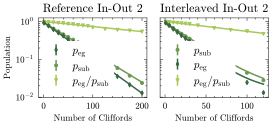

In [46]:
fig4, ax4 = plt.subplots(1, 2, figsize=(5*0.8, 2.5*0.8), sharey=True)


ax4[0].errorbar(x_rb_13,  pop_dict_13['avg']['eeg'], yerr=pop_dict_13['err']['eeg'], fmt='d', label=r'$p_\mathrm{eg}$', color=color_eg)


ax4[0].errorbar(x_rb_13, popln_subspace_avg_13, yerr=popln_subspace_err_13, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)


# ax3[0, 1].errorbar(x_rb_13,  pop_dict_13['avg']['egf'], yerr=pop_dict_13['err']['egf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')

ax4[0].errorbar(x_rb_13, popln_eg_renorm_13, yerr=popln_eg_renorm_err_13, fmt='v', label=r'$p_\mathrm{eg}/p_\mathrm{sub}$', color=color_post,
                linestyle='', zorder=0)



ax4[0].plot(x_rb_fit_13, fit(x_rb_fit_13, *popt_eg_13),  color=color_eg)

ax4[0].plot(x_rb_fit_13, y_fit_pop_13, color=color_subspace, zorder=1)

ax4[0].plot(x_rb_fit_13, y_fit_leak_13, color=color_post, zorder=1)


ax4[1].errorbar(x_rb_x_13, popln_subspace_avg_x_13, yerr=popln_subspace_err_x_13, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)

ax4[1].errorbar(x_rb_x_13,  pop_dict_x_13['avg']['eeg'], yerr=pop_dict_x_13['err']['eeg'], fmt='d', label=r'$p_\mathrm{eg}$', color=color_eg)
# ax3[1, 1].errorbar(x_rb_x_13,  pop_dict_x_13['avg']['egf'], yerr=pop_dict_x_13['err']['egf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')

ax4[1].errorbar(x_rb_x_13, popln_eg_renorm_x_13, yerr=popln_eg_renorm_err_x_13, fmt='v', label=r'$p_\mathrm{eg}/p_\mathrm{sub}$', color=color_post,
                linestyle='', zorder=0)


ax4[1].plot(x_rb_fit_x_13, fit(x_rb_fit_x_13, *popt_eg_x_13),  color=color_eg)

ax4[1].plot(x_rb_fit_x_13, y_fit_pop_x_13, color=color_subspace, zorder=1)

ax4[1].plot(x_rb_fit_x_13, y_fit_leak_x_13, color=color_post, zorder=1)

scale = 'log'

ax4[0].set_yscale(scale)
ax4[1].set_yscale(scale)
ax4[0].set_title('Reference In-Out 2')
ax4[0].set_ylabel('Population')
ax4[1].set_title('Interleaved In-Out 2')

ax4[0].set_xlabel('Number of Cliffords')
ax4[1].set_xlabel('Number of Cliffords')


# change label font size

# for item in ([ax4[0].title, ax4[0].xaxis.label, ax4[0].yaxis.label] +
#              ax4[0].get_xticklabels() + ax4[0].get_yticklabels()):
#     item.set_fontsize(10)

ax4[0].legend(fontsize=11, loc='lower left')
ax4[1].legend(fontsize=11, loc='lower left')

fig4.tight_layout()

fig4.savefig('fidelity_v2_q1q3.pdf')
fig4.savefig('fidelity_v2_q1q3.jpg', dpi=300)
fig4.savefig('fidelity_v2_q1q3.svg')


# RB for the other swap length

## Q1/Q2 short

In [62]:
file_name_q1q2_short = '00035_rb_EgGf_qubit21.h5'

filename_q1q3_long_merged = "S:/QRAM/qram_4QR2/data/data_250119//00007_00008_merged_rb_EgGf_qubit31.npz"

data_path = 'S:\\QRAM\\qram_4QR2\\'
folder = 'data_250119'
expt_path = os.path.join(data_path, 'data', folder)

In [64]:
rbprog = meas.SimultaneousRBEgGfExperiment(config_file=config_path)
temp_data, attrs = prev_data(os.path.join(expt_path, file_name_q1q2_short))
rbprog.data = temp_data
rbprog.cfg = AttrDict(attrs['config'])
rbprog.calib_order = attrs['calib_order']
state_name_str = rbprog.calib_order

data_12_short = rbprog.analyze(fit=True)

S:\QRAM\qram_4QR2\data\data_250119\00035_rb_EgGf_qubit21.h5
Extracted data and attrs ['calib_order', 'config']
[ 1.  6. 12. 18. 24. 30. 36. 42. 48. 54. 60.]


 C:\Users\slab\AppData\Local\Temp\ipykernel_2072\3210409008.py: 17

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

fit1 p1, a, offset [0.99132446 0.94335469 0.01004287]
fit2 a0, b0, c0, p2 [0.01205144 0.41487482 0.47691405 0.9160179 ]


Reopen the short data

In [66]:
filename = file_name_q1q2_short[:5] + '_merged_rb_EgGf_qubit21.npz'
full_filename = os.path.join(data_dir, folder, filename)

# SAVE THE DATA
_xpts = data_12_short['xpts']
pop_12_short = np.asarray(data_12_short['poplns_2q'])

# save the data 
print('saving', full_filename)
np.savez(full_filename, pop_12_short=pop_12_short, xpts=_xpts)

saving S:/QRAM/qram_4QR2/data/data_250119\00035_merged_rb_EgGf_qubit21.npz


In [67]:
# reload the data
data = np.load(full_filename)
pop_12_short = data['pop_12_short']
xpts = data['xpts']
n= len(np.asarray(xpts)[0])

pop_dict_12_short = {}
pop_dict_12_short['avg'] = {}
pop_dict_12_short['err'] = {}
for idx, state in enumerate(state_name_str):
    # do the average and error postselected where pop_13 should be < 1
    
    _pop = pop_12_short[:, :, idx]
    _pop_post_avg = np.zeros(_pop.shape[0])
    _pop_post_err = np.zeros(_pop.shape[0])
    for i in range(_pop.shape[0]):
        pop_slice = _pop[i, :]
        idx_post = np.where(pop_slice < 1)
        _pop_post = pop_slice[idx_post]
        _pop_post_avg[i] = _pop_post.mean()
        _pop_post_err[i] = _pop_post.std()/np.sqrt(len(_pop_post))
        
        
    pop_dict_12_short['avg'][state] = _pop_post_avg
    pop_dict_12_short['err'][state] = _pop_post_err
    
    x_rb_12_short = np.unique(xpts)

In [68]:
# define the subspace population and its error
popln_subspace_avg_12_short=  np.sum([pop_dict_12_short['avg'][state] for state in state_subspace_12], axis=0)
popln_subspace_err_12_short = np.std([pop_dict_12_short['err'][state] for state in state_subspace_12], axis=0)/np.sqrt(n)


_pop_temp = np.zeros_like(pop_12_short[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_subspace_12:
        _pop_temp += pop_12_short[:, :, idx]
popln_subspace_err_12_short = np.std(_pop_temp, axis=1)/np.sqrt(n)


# define the eg/(eg+gf) and its error
popln_eg_12_short = pop_dict_12_short['avg']['geg']
popln_eg_renorm_12_short = popln_eg_12_short/popln_subspace_avg_12_short

idx_eg = state_name_str.index('geg')
_pop_temp = pop_12_short[:, :, idx_eg]
popln_eg_err_12_short = np.std(_pop_temp, axis=1)/np.sqrt(n)

idx_eg = state_name_str.index('geg')
idx_gf = state_name_str.index('ggf')
_pop_temp = pop_12_short[:, :, idx_eg]/(pop_12_short[:, :, idx_eg] + pop_12_short[:, :, idx_gf])
popln_eg_renorm_err_12_short = np.std(_pop_temp, axis=1)/np.sqrt(n)



popln_not_erase_12_short = 1 - np.sum([pop_dict_12_short['avg'][state] for state in state_erasure], axis=0)
_pop_temp = np.zeros_like(pop_12_short[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_erasure:
        _pop_temp += pop_12_short[:, :, idx]
popln_not_erase_err_12_short = np.std(_pop_temp, axis=1)/np.sqrt(n)

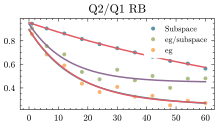

In [69]:
bounds = ([0, 0, 0], [1, np.inf, np.inf])

cut = slice(0, 10)
# cut = slice(0, 100)

popt_12_short, pcov = opt.curve_fit(fit, x_rb_12_short[cut], popln_subspace_avg_12_short[cut], sigma=popln_subspace_err_12_short[cut], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
# popt_12_short, pcov = opt.curve_fit(fit, x_rb_12_short, popln_subspace_avg_12_short, sigma=popln_subspace_err_12_short, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_12_short = np.sqrt(np.diag(pcov))

popt2_12_short, pcov2 = opt.curve_fit(fit, x_rb_12_short[cut], popln_eg_renorm_12_short[cut], p0=[0.8, 0.01, 0.01], sigma=popln_eg_renorm_err_12_short[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr2_12_short = np.sqrt(np.diag(pcov2))

if len(state_erasure) > 0:
    popt3_12_short, pcov3 = opt.curve_fit(fit, x_rb_12_short[cut], popln_not_erase_12_short[cut], p0=[0.8, 0.01, 0.01], sigma=popln_not_erase_err_12_short[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
    perr3_12_short = np.sqrt(np.diag(pcov3))
else:
    popt3_12_short = None
    perr3_12_short = None

# Alternative to fitting eg/subspace: fit to double exponential "survival probability"
popt4_12_short, pcov4 = meas.fitting.fitrb_l1_l2(x_rb_12_short, popln_eg_12_short, p1=popt_12_short[0], sigma=popln_eg_err_12_short)
perr4_12_short = np.sqrt(np.diag(pcov4))

# Alternative to fitting eg/subspace: fit to single exponential "survival probability"
popt5_12_short, pcov5 = opt.curve_fit(fit, x_rb_12_short, popln_eg_12_short, sigma=popln_eg_err_12_short, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr5_12_short = np.sqrt(np.diag(pcov5))

x_rb_fit_12_short = np.linspace(0, np.max(x_rb_12_short), 1000)
y_fit_pop_12_short = fit(x_rb_fit_12_short, *popt_12_short)
y_fit_leak_12_short = fit(x_rb_fit_12_short, *popt2_12_short)
y_fit_surv_12_short = meas.fitting.rb_decay_l1_l2(x_rb_fit_12_short, popt_12_short[0], *popt4_12_short)
y_fit_surv_single_12_short = fit(x_rb_fit_12_short, *popt5_12_short)

if len(state_erasure) > 0:
    y_fit_erase_12_short = fit(x_rb_fit_12_short, *popt3_12_short)
else:
    y_fit_erase_12_short = None

plt.figure()
plt.title("Q2/Q1 RB")
plt.plot(x_rb_12_short, popln_subspace_avg_12_short, 'o', label='Subspace')
plt.plot(x_rb_fit_12_short, y_fit_pop_12_short)
plt.plot(x_rb_12_short, popln_eg_renorm_12_short, 'o', label='eg/subspace')
plt.plot(x_rb_fit_12_short, y_fit_leak_12_short)
plt.plot(x_rb_12_short, popln_eg_12_short, 'o', label='eg')
plt.plot(x_rb_fit_12_short, y_fit_surv_12_short)
plt.plot(x_rb_fit_12_short, y_fit_surv_single_12_short)
plt.legend()
plt.tight_layout()
plt.show()

In [119]:
results_12_short = get_errors(
    popt_12_short, popt2_12_short, popt3_12_short, popt4_12_short, popt5_12_short,
    perr_12_short, perr2_12_short, perr3_12_short, perr4_12_short, perr5_12_short,
    None, None, None, None, None, None, None, None, None, None,
    get_p2_from=get_p2_from,second_method=second_method
)

print("All values in percent")
print("Q2/Q1")
# print('Error reference per X: %.3f +/- %.3f' % (results_12_short['err'] / avg_X_per_clifford*100, results_12_short['err_err'] / avg_X_per_clifford*100))
# print('Error interleaved per X: %.3f +/- %.3f' % (results_12_short['err_X'] / (avg_X_per_clifford+1)*100, results_12_short['err_X_err'] / (avg_X_per_clifford+1)*100))
# print('Leakage error from reference per X: %.3f +/- %.3f' % (results_12_short['L'] / avg_X_per_clifford*100, results_12_short['Lerr'] / avg_X_per_clifford*100))
# print('Leakage error from interleaved per X: %.3f +/- %.3f' % (results_12_short['L_int'] / avg_X_per_clifford*100, results_12_short['Lerr_x'] / avg_X_per_clifford*100))
# print('Erasure from reference: %.3f +/- %.3f' % (results_12_short['erase'] / avg_X_per_clifford*100, results_12_short['erase_err'] / avg_X_per_clifford*100))
# print('Erasure from interleaved: %.3f +/- %.3f' % (results_12_short['erase_x'] / avg_X_per_clifford*100, results_12_short['erase_err_x'] / avg_X_per_clifford*100))

print('Error reference per X (total error per clifford): %.3f +/- %.3f' % (results_12_short['err']*100, results_12_short['err_err'] *100))
print('Leakage error from reference per X: %.3f +/- %.3f' % (results_12_short['L']*100, results_12_short['Lerr'] *100))
print('Erasure from reference: %.3f +/- %.3f' % (results_12_short['erase']*100, results_12_short['erase_err'] *100))

Using second method
lambda2 0.9408594884908336
lambda1 0.9901299964716866
err leak free: 2.9570255754583163
err err leak free: 0.45444723867789627
lambda2 0.9315732020197819
p2 from: 2
All values in percent
Q2/Q1
Error reference per X (total error per clifford): 3.862 +/- 0.475
Leakage error from reference per X: 0.882 +/- 0.213
Erasure from reference: 0.000 +/- 0.000


## Q1/Q3 long

In [70]:
# reload the data
full_filename = os.path.join(data_dir, folder, filename_q1q3_long_merged)
data = np.load(full_filename)
pop_13_long = data['pop_13']
xpts = data['xpts']
n = len(np.asarray(xpts)[0])

pop_dict_13_long = {}
pop_dict_13_long['avg'] = {}
pop_dict_13_long['err'] = {}
for idx, state in enumerate(state_name_str):
    # do the average and error postselected where pop_13_long should be < 1
    
    _pop = pop_13_long[:, :, idx]
    _pop_post_avg = np.zeros(_pop.shape[0])
    _pop_post_err = np.zeros(_pop.shape[0])
    for i in range(_pop.shape[0]):
        pop_slice = _pop[i, :]
        idx_post = np.where(pop_slice < 1)
        _pop_post = pop_slice[idx_post]
        _pop_post_avg[i] = _pop_post.mean()
        _pop_post_err[i] = _pop_post.std()/np.sqrt(len(_pop_post))
    pop_dict_13_long['avg'][state] = _pop_post_avg
    pop_dict_13_long['err'][state] = _pop_post_err

    # pop_dict_13_long['avg'][state] = pop_13_long[:, :, idx].mean(axis=1)
    # pop_dict_13_long['err'][state] = pop_13_long[:, :, idx].std(axis=1)/np.sqrt(n)
    x_rb_13_long = np.unique(xpts)
print(xpts) 

[[  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 175 200]
 [  1  10  20  30  40  50  60  70  80  90 100 125 150 1

In [71]:
# define the subspace population and its error
popln_subspace_avg_13_long=  np.sum([pop_dict_13_long['avg'][state] for state in state_subspace_13], axis=0)
popln_subspace_err_13_long = np.std([pop_dict_13_long['err'][state] for state in state_subspace_13], axis=0)/np.sqrt(n)


_pop_temp = np.zeros_like(pop_13_long[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_subspace_13:
        _pop_temp += pop_13_long[:, :, idx]
popln_subspace_err_13_long = np.std(_pop_temp, axis=1)/np.sqrt(n)


# define the eg/(eg+gf) and its error
popln_eg_13_long = pop_dict_13_long['avg']['eeg']
popln_eg_renorm_13_long = popln_eg_13_long/popln_subspace_avg_13_long

idx_eg = state_name_str.index('eeg')
_pop_temp = pop_13_long[:, :, idx_eg]
popln_eg_err_13_long = np.std(_pop_temp, axis=1)/np.sqrt(n)

idx_eg = state_name_str.index('eeg')
idx_gf = state_name_str.index('egf')
_pop_temp = pop_13_long[:, :, idx_eg]/(pop_13_long[:, :, idx_eg] + pop_13_long[:, :, idx_gf])
popln_eg_renorm_err_13_long = np.std(_pop_temp, axis=1)/np.sqrt(n)



popln_not_erase_13_long = 1 - np.sum([pop_dict_13_long['avg'][state] for state in state_erasure], axis=0)
_pop_temp = np.zeros_like(pop_13_long[:, :, 0])
for idx, state in enumerate(state_name_str):
    if state in state_erasure:
        _pop_temp += pop_13_long[:, :, idx]
popln_not_erase_err_13_long = np.std(_pop_temp, axis=1)/np.sqrt(n)

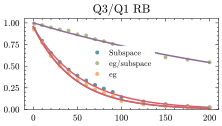

In [72]:
bounds = ([0, 0, 0], [1, np.inf, np.inf])

cut = slice(0, 200)

popt_13_long, pcov = opt.curve_fit(fit, x_rb_13_long[cut], popln_subspace_avg_13_long[cut], sigma=popln_subspace_err_13_long[cut], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_13_long = np.sqrt(np.diag(pcov))

popt2_13_long, pcov2 = opt.curve_fit(fit, x_rb_13_long[cut], popln_eg_renorm_13_long[cut], p0=[0.8, 0.01, 0.01], sigma=popln_eg_renorm_err_13_long[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr2_13_long = np.sqrt(np.diag(pcov2))

if len(state_erasure) > 0:
    popt3_13_long, pcov3 = opt.curve_fit(fit, x_rb_13_long[cut], popln_not_erase_13_long[cut], p0=[0.8, 0.01, 0.01], sigma=popln_not_erase_err_13_long[cut], absolute_sigma=True, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
    perr3_13_long = np.sqrt(np.diag(pcov3))
else:
    popt3_13_long = None
    perr3_13_long = None

# Alternative to fitting eg/subspace: fit to double exponential "survival probability"
popt4_13_long, pcov4 = meas.fitting.fitrb_l1_l2(x_rb_13_long, popln_eg_13_long, p1=popt_13_long[0], sigma=popln_eg_err_13_long)
perr4_13_long = np.sqrt(np.diag(pcov4))

# Alternative to fitting eg/subspace: fit to single exponential "survival probability"
popt5_13_long, pcov5 = opt.curve_fit(fit, x_rb_13_long, popln_eg_13_long, sigma=popln_eg_err_13_long, absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr5_13_long = np.sqrt(np.diag(pcov5))

x_rb_fit_13_long = np.linspace(0, np.max(x_rb_13_long), 1000)
y_fit_pop_13_long = fit(x_rb_fit_13_long, *popt_13_long)
y_fit_leak_13_long = fit(x_rb_fit_13_long, *popt2_13_long)
y_fit_surv_13_long = meas.fitting.rb_decay_l1_l2(x_rb_fit_13_long, popt_13_long[0], *popt4_13_long)
y_fit_surv_single_13_long = fit(x_rb_fit_13_long, *popt5_13_long)

if len(state_erasure) > 0:
    y_fit_erase_13_long = fit(x_rb_fit_13_long, *popt3_13_long)
else:
    y_fit_erase_13_long = None

plt.figure()
plt.title("Q3/Q1 RB")
plt.plot(x_rb_13_long, popln_subspace_avg_13_long, 'o', label='Subspace')
plt.plot(x_rb_fit_13_long, y_fit_pop_13_long)
plt.plot(x_rb_13_long, popln_eg_renorm_13_long, 'o', label='eg/subspace')
plt.plot(x_rb_fit_13_long, y_fit_leak_13_long)
plt.plot(x_rb_13_long, popln_eg_13_long, 'o', label='eg')
plt.plot(x_rb_fit_13_long, y_fit_surv_13_long)
plt.plot(x_rb_fit_13_long, y_fit_surv_single_13_long)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1.05)
# log scale 
plt.show()

In [121]:
results_13_long = get_errors(
    popt_13_long, popt2_13_long, popt3_13_long, popt4_13_long, popt5_13_long,
    perr_13_long, perr2_13_long, perr3_13_long, perr4_13_long, perr5_13_long,
    None, None, None, None, None, None, None, None, None, None,
    get_p2_from=get_p2_from,second_method=second_method
)

print("All values in percent")
print("Q3/Q1")
print('Error reference (total error per clifford): %.3f +/- %.3f' % (results_13_long['err']*100, results_13_long['err_err']*100))
print('Leakage error from reference: %.3f +/- %.3f' % (results_13_long['L']*100, results_13_long['Lerr']*100))
print('Erasure from reference: %.3f +/- %.3f' % (results_13_long['erase']*100, results_13_long['erase_err']*100))

Using second method
lambda2 0.9786282118012377
lambda1 0.9818129510186359
err leak free: 1.0685894099381144
err err leak free: 0.007411672865059798
lambda2 0.9608298525786638
p2 from: 2
All values in percent
Q3/Q1
Error reference (total error per clifford): 2.868 +/- 0.013
Leakage error from reference: 1.819 +/- 0.015
Erasure from reference: 0.000 +/- 0.000


## Plot

In [83]:
# used to make the save plot filename
full_filenames = [
    "00007_00008_31", # long q3q1
    "00004_00005_21", # long q2q1
    "00014_00015_31", # short q3q1
    "00035_21" # short q2q1
]

In [78]:
popt_eg_12_short, pcov = opt.curve_fit(fit, x_rb_12_short, pop_dict_12_short['avg']['geg'], sigma=pop_dict_12_short['err']['geg'], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_eg_12_short = np.sqrt(np.diag(pcov))

popt_eg_13_long, pcov = opt.curve_fit(fit, x_rb_13_long, pop_dict_13_long['avg']['eeg'], sigma=pop_dict_13_long['err']['eeg'], absolute_sigma=True, p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
perr_eg_13_long = np.sqrt(np.diag(pcov))

In [79]:
color_eg = '#386641'
color_subspace = '#6a994e'
color_post = '#a7c957'

rb popln geg 12_short [0.85673017 0.68397501 0.59062293 0.43652476 0.36529919 0.40850999
 0.32573888 0.33307482 0.25210242 0.29063996 0.27149382]
irb popln geg 12 [0.89281456 0.71000072 0.55926209 0.42043346 0.34341553 0.26245887
 0.20535902 0.16645422 0.13024018 0.106021   0.10349106 0.05598517
 0.02828317 0.01218762 0.0042838 ]
supmat\rb_irb_00007_00008_31_00004_00005_21_00014_00015_31_00035_21


 C:\Users\slab\AppData\Local\Temp\ipykernel_2072\4131157899.py: 91

Saved svg plot S:\QRAM\qram_4QR2\plots\paper\supmat\rb_irb_00007_00008_31_00004_00005_21_00014_00015_31_00035_21.svg
Saved pdf plot S:\QRAM\qram_4QR2\plots\paper\supmat\rb_irb_00007_00008_31_00004_00005_21_00014_00015_31_00035_21.pdf


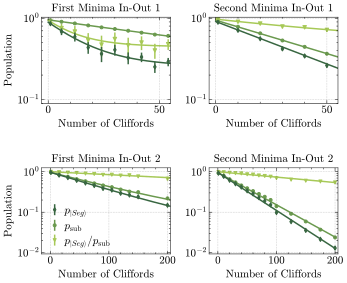

In [103]:
darkmode = False
saveplot = True

plt.style.use('default') # need to set this first to reset out of dark mode
plt.style.use('S:\Connie\prx.mplstyle')
if darkmode: plt.style.use('dark_background')

fig3, ax3 = plt.subplots(2, 2, figsize=(5, 4.25), sharey=False)
plt.subplots_adjust(hspace=0.75) 
plt.subplots_adjust(wspace=0.3) 

labelsize = 11

ax3[0, 0].errorbar(x_rb_12_short,  pop_dict_12_short['avg']['geg'], yerr=z*pop_dict_12_short['err']['geg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
print("rb popln geg 12_short", pop_dict_12_short['avg']['geg'])
ax3[0, 0].errorbar(x_rb_12_short, popln_subspace_avg_12_short, yerr=z*popln_subspace_err_12_short, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
ax3[0, 0].errorbar(x_rb_12_short, popln_eg_renorm_12_short, yerr=z*popln_eg_renorm_err_12_short, fmt='v', markersize=3.5, label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post, linestyle='', zorder=0)
# ax3[0, 0].errorbar(x_rb_12_short,  pop_dict_12_short['avg']['ggf'], yerr=z*pop_dict_12_short['err']['ggf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[0, 0].plot(x_rb_fit_12_short, fit(x_rb_fit_12_short, *popt_eg_12_short),  color=color_eg)
ax3[0, 0].plot(x_rb_fit_12_short, y_fit_pop_12_short, color=color_subspace, zorder=1)
ax3[0, 0].plot(x_rb_fit_12_short, y_fit_leak_12_short, color=color_post, zorder=1)
ax3[0, 0].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)


ax3[0, 1].errorbar(x_rb_12,  pop_dict_12['avg']['geg'], yerr=z*pop_dict_12['err']['geg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
ax3[0, 1].errorbar(x_rb_12, popln_subspace_avg_12, yerr=z*popln_subspace_err_12, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
print("irb popln geg 12", pop_dict_12['avg']['geg'])
# ax3[1, 0].errorbar(x_rb_12,  pop_dict_12['avg']['ggf'], yerr=z*pop_dict_12['err']['ggf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[0, 1].errorbar(x_rb_12, popln_eg_renorm_12, yerr=z*popln_eg_renorm_err_12, fmt='v', markersize=3.5, label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post, linestyle='', zorder=0)
ax3[0, 1].plot(x_rb_fit_12, fit(x_rb_fit_12, *popt_eg_12),  color=color_eg)
ax3[0, 1].plot(x_rb_fit_12, y_fit_pop_12, color=color_subspace, zorder=1)
ax3[0, 1].plot(x_rb_fit_12, y_fit_leak_12, color=color_post, zorder=1)
ax3[0, 1].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)

ax3[1, 0].errorbar(x_rb_13,  pop_dict_13['avg']['eeg'], yerr=z*pop_dict_13['err']['eeg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
ax3[1, 0].errorbar(x_rb_13, popln_subspace_avg_13, yerr=z*popln_subspace_err_13, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
# ax3[0, 1].errorbar(x_rb_13,  pop_dict_13['avg']['egf'], yerr=z*pop_dict_13['err']['egf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[1, 0].errorbar(x_rb_13, popln_eg_renorm_13, yerr=z*popln_eg_renorm_err_13, fmt='v', label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post,
                linestyle='', zorder=0)
ax3[1, 0].plot(x_rb_fit_13, fit(x_rb_fit_13, *popt_eg_13),  color=color_eg)
ax3[1, 0].plot(x_rb_fit_13, y_fit_pop_13, color=color_subspace, zorder=1)
ax3[1, 0].plot(x_rb_fit_13, y_fit_leak_13, color=color_post, zorder=1)
# ax3[1, 0].sharex(ax3[0, 0])
ax3[1, 0].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)

ax3[1, 1].errorbar(x_rb_13_long,  pop_dict_13_long['avg']['eeg'], yerr=z*pop_dict_13_long['err']['eeg'], fmt='d', label=r'$p_{\left|Seg\right>}$', color=color_eg)
ax3[1, 1].errorbar(x_rb_13_long, popln_subspace_avg_13_long, yerr=z*popln_subspace_err_13_long, fmt='o', label=r'$p_\mathrm{sub}$', color=color_subspace,
                linestyle='', zorder=0)
# ax3[1, 1].errorbar(x_rb_13_long,  pop_dict_13_long['avg']['egf'], yerr=z*pop_dict_13_long['err']['egf'], fmt='d', label=r'$p_\mathrm{eg}$', color='black')
ax3[1, 1].errorbar(x_rb_13_long, popln_eg_renorm_13_long, yerr=z*popln_eg_renorm_err_13_long, fmt='v', label=r'$p_{\left|Seg\right>}/p_\mathrm{sub}$', color=color_post,
                linestyle='', zorder=0)
ax3[1, 1].plot(x_rb_fit_13_long, fit(x_rb_fit_13_long, *popt_eg_13_long),  color=color_eg)
ax3[1, 1].plot(x_rb_fit_13_long, y_fit_pop_13_long, color=color_subspace, zorder=1)
ax3[1, 1].plot(x_rb_fit_13_long, y_fit_leak_13_long, color=color_post, zorder=1)
# ax3[1, 1].sharex(ax3[0, 1])
ax3[1, 1].tick_params(axis="both", which="major", labelbottom=True, labelleft=True, pad=2)


# ax3[0].errorbar(x_rb_12, popln_subspace_avg_12, yerr=z*popln_subspace_err_12, fmt='o', label='interleaved', color=irb_color,
#                 linestyle='', zorder=0)


scale = 'log'

plt.sca(ax3[0, 0])
plt.grid(color='k', alpha=0.2)
ax3[0, 0].set_yscale(scale)
ax3[0, 0].set_xticks([0, 50])
ax3[0, 0].set_xlim(None, 55)
ax3[0, 0].set_yticks([1, 1e-1])
ax3[0, 0].set_ylim(9e-2, None)
ax3[0, 0].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

plt.sca(ax3[0, 1])
plt.grid(color='k', alpha=0.2)
ax3[0, 1].set_yscale(scale)
# ax3[0, 1].sharey(ax3[0, 0])
ax3[0, 1].sharex(ax3[0, 0])
ax3[0, 1].sharey(ax3[0, 0])
ax3[0, 1].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

plt.sca(ax3[1, 0])
plt.grid(color='k', alpha=0.2)
ax3[1, 0].set_yscale(scale)
ax3[1, 0].set_yticks([1, 1e-1])
ax3[1, 0].set_xticks([0, 100, 200])
ax3[1, 0].set_xlim(None, 205)
ax3[1, 0].sharey(ax3[1, 1])
ax3[1, 0].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

plt.sca(ax3[1, 1])
plt.grid(color='k', alpha=0.2)
ax3[1, 1].set_yscale(scale)
# ax3[1, 1].set_xticks([0, 50, 100, 150, 200])
ax3[1, 1].sharex(ax3[1, 0])
ax3[1, 1].tick_params(axis="both", which="major", labelsize=labelsize, pad=2)

ax3[0, 0].set_title('First Minima In-Out 1', fontsize=labelsize)
ax3[1, 0].set_title('First Minima In-Out 2', fontsize=labelsize)
ax3[0, 1].set_title('Second Minima In-Out 1', fontsize=labelsize)
ax3[1, 1].set_title('Second Minima In-Out 2', fontsize=labelsize)

ax3[0, 0].set_ylabel('Population', fontsize=labelsize)
# ax3[0, 1].set_ylabel('Population', fontsize=labelsize)
ax3[1, 0].set_ylabel('Population', fontsize=labelsize)
# ax3[1, 1].set_ylabel('Population', fontsize=labelsize)

ax3[0, 0].set_xlabel('Number of Cliffords', fontsize=labelsize)
ax3[0, 1].set_xlabel('Number of Cliffords', fontsize=labelsize)
ax3[1, 0].set_xlabel('Number of Cliffords', fontsize=labelsize)
ax3[1, 1].set_xlabel('Number of Cliffords', fontsize=labelsize)

# ax3[0, 0].legend(fontsize=labelsize, loc='lower left', frameon=False)
# ax3[0, 1].legend(fontsize=labelsize, loc='upper right', frameon=False)
ax3[1, 0].legend(fontsize=labelsize, loc='lower left', bbox_to_anchor=(0.0, 0.01), frameon=False, handletextpad=0.2, borderpad=0.01)
# ax3[1, 1].legend(fontsize=labelsize, loc='lower left', frameon=False)

# ax3.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', frameon=True, edgecolor='k', fontsize=10)

# fig3.tight_layout()


save_plot_path = 'S:\\QRAM\\qram_4QR2\\plots\\paper'

filepaths_str = '_'.join(full_filenames)
filename = f'supmat\\rb_irb_{filepaths_str}' + ('_dark' if darkmode else '')
print(filename)

savename = os.path.join(save_plot_path, filename+'.svg')
if saveplot:
    plt.savefig(savename, bbox_inches='tight') #, transparent=darkmode)
    print("Saved svg plot", savename)

savename = os.path.join(save_plot_path, filename+'.pdf')
if saveplot:
    plt.savefig(savename, bbox_inches='tight') #, transparent=darkmode)
    print("Saved pdf plot", savename)

plt.show()
plt.style.use('default') # need to set this first to reset out of dark mode
plt.style.use('S:\Connie\prx.mplstyle')

# Second method

## RB 

In [66]:
file_name = '00000_SimultaneousRBEgGf.h5'
folder = 'data_240617'
file = h5py.File(folder+'/'+file_name, 'r')

In [ ]:
file.keys()

In [ ]:
print(file.keys())

l1 = np.asarray(file['l1'])
l2 = np.asarray(file['l2'])
# popln_eg = np.asarray(file['popln_eg'])
popln_eg_avg = np.asarray(file['popln_eg_avg'])
popln_eg_std = np.asarray(file['popln_eg_std'])
# popln_subspace = np.asarray(file['popln_subspace'])
popln_subspace_avg = np.asarray(file['popln_subspace_avg'])
popln_subspace_std = np.asarray(file['popln_subspace_std'])
xpts = np.asarray(file['xpts'])


In [ ]:
def fit(x, p, B, A):
    return B*p**x + A

def fit2(x, p1, B0, p2, A0, C0):
    return A0 + B0*p1**x + C0*p2**x


bounds_1 = ([0, 0, 0], [1, np.inf, 1])

popt, pcov = opt.curve_fit(fit, np.unique(xpts), popln_subspace_avg,
                            p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds_1)
# use the fitted p to fit the subspace 

_fit2 = lambda x, B0, p2, A0, C0: fit2(x, popt[0], B0, p2, A0, C0)

# we need 0<A0<A, 0<C0<1, 0<A0+B0+C0<1
bounds = ([0, 0, 0, 0], [1, 1, popt[2], 1])
popt2, pcov2 = opt.curve_fit(_fit2, np.unique(xpts), popln_eg_avg, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
popt3, pcov3 = opt.curve_fit(fit, np.unique(xpts), popln_eg_avg, maxfev=10000, xtol=1e-15, ftol=1e-15,  p0=[0.99, 0.01, 0.01])



perr = np.sqrt(np.diag(pcov))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))
L_ref = (1 -popt[2])*(1 - popt[0])
L_ref_err = L_ref*np.sqrt((perr[2]*(1 - popt[2]))**2 + (perr[0]*(1 - popt[0]))**2)

d = 2
p1 = popt[0]
p1_err = perr[0]
p2 = popt2[1]
p2_err = perr2[1]
F = 1/d*((d -1)*p2 + 1 - L_ref)

print('p1 subspace: ', p1, '+/-', p1_err)
print('p2 eg: ', p2, '+/-', p2_err)
print('L_ref: ', L_ref, '+/-', L_ref_err)
print('F: ', F)
print('popt', popt)
print('perr', perr)
print('popt2', popt2)
print('perr2', perr2)

p = p2


### try using lmfit

In [13]:
def fit(x, p, B):
    return B*p**x

def fit2(x, p1, B0, p2, A0, C0):
    return A0 + B0*p1**x + C0*p2**x

In [ ]:
# subspace fititng

p_true = create_params(p = p, B = popt2[0])
 
def residual(pars, x, data=None):
    p = pars['p']
    B = pars['B']
    model = fit(x, p, B)
    if data is None:
        return model
    return model - data

fit_params = create_params(p=dict(value=p, min=0, max=1),
                                      B=dict(value=popt2[0], min=0, max=1))

x = np.unique(xpts)
data = popln_subspace_avg
out = minimize(residual, fit_params, args=(x,), kws={'data': data})
fit = residual(out.params, x)

report_fit(out, modelpars=p_true, correl_mode='table')

p1 = out.params['p'].value
p1_err = out.params['p'].stderr

# eg fitting 

_fit2 = lambda x, B0, p2, A0, C0: fit2(x, p1, B0, p2, A0, C0)


def residual2(pars, x, data=None):
    p2 = pars['p2']
    B0 = pars['B0']
    A0 = pars['A0']
    C0 = pars['C0']
    model = _fit2(x, B0, p2, A0, C0)
    if data is None:
        return model
    return model - data

fit_params2 = create_params(p2=dict(value=popt2[1], min=0, max=1),
                                        B0=dict(value=popt2[0], min=-np.inf, max=np.inf),
                                        A0=dict(value=0, min=-np.inf, max=np.inf),
                                        C0=dict(value=0, min=-np.inf, max=np.inf))

x = np.unique(xpts)
data = popln_eg_avg

out2 = minimize(residual2, fit_params2, args=(x,), kws={'data': data})
fit2 = residual2(out2.params, x)

report_fit(out2, modelpars=popt2, correl_mode='table')

p2 = out2.params['p2'].value
p2_err = out2.params['p2'].stderr





# # extract the fitted parameters
# p1_bis = result.params['p'].value
# _fit2 = lambda x, B0, p2, A0, C0: fit2(x, p1_bis, B0, p2, A0, C0)
# fit_model2 = Model(_fit2)
# params2 = fit_model2.make_params(B0=popt2[0], p2=popt2[1], A0=popt2[2], C0=popt2[3])
# result2 = fit_model2.fit(popln_eg_avg, params2, x=np.unique(xpts))

# print('First fit: ')
# print(result.fit_report())
# print('------------------------')
# print('Second fit: ')
# print(result2.fit_report())
# p2_bis = result2.params['p2'].value

# L_ref_bis = (1 -p2)*(1 - p1)
# L_ref_bis_err = L_ref_bis*np.sqrt((p2_err*(1 - p2))**2 + (p1_err*(1 - p1))**2)
# print('L_ref_bis: ', L_ref_bis, '+/-', L_ref_bis_err)

# plot the second fit

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

# ax[0].plot(xpts, popln_eg, 'o-', color='#445fab', linestyle='none', alpha=0.1)
# ax[1].plot(xpts, popln_subspace, 'o-', color='#ab4d44', linestyle='none', alpha=0.1)
ax[0].errorbar(np.unique(xpts), popln_eg_avg, yerr=popln_eg_std, fmt='-o', color='#445fab', label='', markersize=5, linestyle='none')
ax[1].errorbar(np.unique(xpts), popln_subspace_avg, yerr=popln_subspace_std, fmt='-o', color='#ab4d44', label='Subspace', markersize=5, linestyle='none')

x = np.linspace(0, np.max(xpts), 1000)
y = fit(x, *popt)
y_plus = fit(x, popt[0] + perr[0], popt[1] + perr[1], popt[2] + perr[2])
y_minus = fit(x, popt[0] - perr[0], popt[1] - perr[1], popt[2] - perr[2])
ax[1].plot(x, y, color='black', zorder=10)
ax[1].fill_between(x, y_minus, y_plus, color='black', alpha=0.2, zorder=10)
# add text for the leackage and p and there errorbars
textstr = '\n'.join((
    r'$L=%.2f \pm %.2f$' % (L_ref*100, L_ref_err*100),
    r'$p1=%.2f \pm %.2f$' % (popt[0], perr[0])))
props = dict(boxstyle='round', alpha=0)
# place a text box in lower left in axes coords
ax[1].text(0.05, 0.05, textstr, transform=ax[1].transAxes, fontsize=10)

# popt2 = np.insert(popt2, 1, popt[0])
y2 = _fit2(x, *popt2)
y3 = fit(x, *popt3)
y2_plus = _fit2(x, popt2[0] + perr2[0], popt2[1], popt2[2] + perr2[2], popt2[3] + perr2[3])
y2_minus = _fit2(x, popt2[0] - perr2[0], popt2[1], popt2[2] - perr2[2], popt2[3] - perr2[3])
ax[0].plot(x, y2, color='black', zorder=10)
ax[0].plot(x, y3, color='grey', zorder=10)
ax[0].fill_between(x, y2_minus, y2_plus, color='black', alpha=0.2, zorder=10)




# ax[1].plot(x, y2, color='black')

ax[0].set_ylabel('Population')
ax[1].set_ylabel('Population')
ax[0].set_xlabel('Number of Cliffords')
ax[1].set_xlabel('Number of Cliffords')

ax[0].legend()
ax[1].legend()

# ax[0].set_yscale('log')
# ax[1].set_yscale('log')


# display the fit parameters in the plot

# textstr = '\n'.join((
#     r'$A=%.2f$' % (popt[1], ),
#     r'$B=%.2f$' % (popt[2], ),
#     r'$p=%.2f$' % (popt[0], )))
# props = dict(boxstyle='round', alpha=0.5)
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)



## IRB X

In [ ]:
file_name = '00001_SimultaneousRBEgGf.h5'
folder = 'data_240617'
file = h5py.File(folder+'/'+file_name, 'r')
file.keys()

In [ ]:
print(file.keys())

l1 = np.asarray(file['l1'])
l2 = np.asarray(file['l2'])
# popln_eg = np.asarray(file['popln_eg'])
popln_eg_avg = np.asarray(file['popln_eg_avg'])
popln_eg_std = np.asarray(file['popln_eg_std'])
# popln_subspace = np.asarray(file['popln_subspace'])
popln_subspace_avg = np.asarray(file['popln_subspace_avg'])
popln_subspace_std = np.asarray(file['popln_subspace_std'])
xpts = np.asarray(file['xpts'])


In [ ]:
def fit(x, p, B, A):
    return B*p**x + A

def fit2(x, p1, B0, p2, A0, C0):
    return A0 + B0*p1**x + C0*p2**x


bounds_1 = ([0, 0, 0], [1, np.inf, 1])

popt, pcov = opt.curve_fit(fit, np.unique(xpts), popln_subspace_avg,
                            p0=[0.99, 0.01, 0.01], maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds_1)
# use the fitted p to fit the subspace 

_fit2 = lambda x, B0, p2, A0, C0: fit2(x, popt[0], B0, p2, A0, C0)

# we need 0<A0<A, 0<C0<1, 0<A0+B0+C0<1
bounds = ([0, 0, 0, 0], [1, 1, popt[2], 1])
popt2, pcov2 = opt.curve_fit(_fit2, np.unique(xpts), popln_eg_avg, maxfev=10000, xtol=1e-15, ftol=1e-15, bounds=bounds)
popt3, pcov3 = opt.curve_fit(fit, np.unique(xpts), popln_eg_avg, maxfev=10000, xtol=1e-15, ftol=1e-15,  p0=[0.99, 0.01, 0.01])



perr = np.sqrt(np.diag(pcov))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))
Lc = (1 -popt[2])*(1 - popt[0])
Lc_err = Lc*np.sqrt((perr[2]*(1 - popt[2]))**2 + (perr[0]*(1 - popt[0]))**2)

d = 2
p1 = popt[0]
p1_err = perr[0]
p2 = popt2[1]
p2_err = perr2[1]

print('p1 subspace: ', p1, '+/-', p1_err)
print('p2 eg: ', p2, '+/-', p2_err)
print('Lc: ', Lc, '+/-', Lc_err)


pc = p2
E_1 = (d-1)*(np.abs(p - pc/p) + (1-p))/d
E_2 = 2*(d**2 - 1)*(1-p)/(p*d**2) + 4*np.sqrt((1-p)*(d**2-1))/p
rx_err = np.min([E_1, E_2])

rx = (d-1)*(1 - pc/p)/d
Lx = 1 - (1 - Lc)/(1 - L_ref)
Fx = 1 - rx - Lx

print('rx:{} +/- {}'.format(rx, rx_err))
print('Lx: {}'.format(Lx))
print('Fx: {}'.format(Fx))



### try using lmfit

In [ ]:
params = fit_model.make_params(p=popt[0], B=popt[1], A=popt[2])
result_irb = fit_model.fit(popln_subspace_avg, params, x=np.unique(xpts))

# extract the fitted parameters
p1_irb_bis = result_irb.params['p'].value
_fit2 = lambda x, B0, p2, A0, C0: fit2(x, p2, B0, p2, A0, C0)
fit_model2 = Model(_fit2)
params2 = fit_model2.make_params(B0=popt2[0], p2=popt2[1], A0=popt2[2], C0=popt2[3])
result2 = fit_model2.fit(popln_eg_avg, params2, x=np.unique(xpts))

print('First fit: ')
print(result.fit_report())
print('------------------------')
print('Second fit: ')
print(result2.fit_report())
p2_bis = result2.params['p2'].value

L_ref_bis = (1 -p2)*(1 - p1)
L_ref_bis_err = L_ref_bis*np.sqrt((p2_err*(1 - p2))**2 + (p1_err*(1 - p1))**2)
print('L_ref_bis: ', L_ref_bis, '+/-', L_ref_bis_err)

# plot the second fit

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

# ax[0].plot(xpts, popln_eg, 'o-', color='#445fab', linestyle='none', alpha=0.1)
# ax[1].plot(xpts, popln_subspace, 'o-', color='#ab4d44', linestyle='none', alpha=0.1)
ax[0].errorbar(np.unique(xpts), popln_eg_avg, yerr=popln_eg_std, fmt='-o', color='#445fab', label='', markersize=5, linestyle='none')
ax[1].errorbar(np.unique(xpts), popln_subspace_avg, yerr=popln_subspace_std, fmt='-o', color='#ab4d44', label='Subspace', markersize=5, linestyle='none')

x = np.linspace(0, np.max(xpts), 1000)
y = fit(x, *popt)
y_plus = fit(x, popt[0] + perr[0], popt[1] + perr[1], popt[2] + perr[2])
y_minus = fit(x, popt[0] - perr[0], popt[1] - perr[1], popt[2] - perr[2])
ax[1].plot(x, y, color='black', zorder=10)
ax[1].fill_between(x, y_minus, y_plus, color='black', alpha=0.2, zorder=10)
# add text for the leackage and p and there errorbars
textstr = '\n'.join((
    r'$L=%.2f \pm %.2f$' % (L*100, Lerr*100),
    r'$p1=%.2f \pm %.2f$' % (popt[0], perr[0])))
props = dict(boxstyle='round', alpha=0)
# place a text box in lower left in axes coords
ax[1].text(0.05, 0.05, textstr, transform=ax[1].transAxes, fontsize=10)

# popt2 = np.insert(popt2, 1, popt[0])
y2 = _fit2(x, *popt2)
y3 = fit(x, *popt3)
y2_plus = _fit2(x, popt2[0] + perr2[0], popt2[1], popt2[2] + perr2[2], popt2[3] + perr2[3])
y2_minus = _fit2(x, popt2[0] - perr2[0], popt2[1], popt2[2] - perr2[2], popt2[3] - perr2[3])
ax[0].plot(x, y2, color='black', zorder=10)
ax[0].plot(x, y3, color='grey', zorder=10)
ax[0].fill_between(x, y2_minus, y2_plus, color='black', alpha=0.2, zorder=10)




# ax[1].plot(x, y2, color='black')

ax[0].set_ylabel('Population')
ax[1].set_ylabel('Population')
ax[0].set_xlabel('Number of Cliffords')
ax[1].set_xlabel('Number of Cliffords')

ax[0].legend()
ax[1].legend()

# ax[0].set_yscale('log')
# ax[1].set_yscale('log')


# display the fit parameters in the plot

# textstr = '\n'.join((
#     r'$A=%.2f$' % (popt[1], ),
#     r'$B=%.2f$' % (popt[2], ),
#     r'$p=%.2f$' % (popt[0], )))
# props = dict(boxstyle='round', alpha=0.5)
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)



## Debugging the code

In [194]:
file_name = '00002_SimultaneousRBEgGf.h5'
folder = 'data_240617'
file = h5py.File(folder+'/'+file_name, 'r')

In [ ]:
file.keys()

In [ ]:
poplns_2q = np.asarray(file['poplns_2q'])
xpts = np.asarray(file['xpts'])

x = np.unique(xpts)

ordering = ['gg', 'ge', 'eg', 'ee', 'gf', 'ef']
p = {'avg':{}, 'std':{}}

In [197]:
for i, key in enumerate(ordering):
    p['avg'][key] = np.average(poplns_2q[:,:,i], axis=1)
    p['std'][key] = np.std(poplns_2q[:,:,i], axis=1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))


for key in ordering:
    ax.errorbar(x, p['avg'][key], yerr=p['std'][key], fmt='o-', label=key)

ax.set_ylabel('Population')
ax.set_xlabel('Number of Cliffords')
ax.legend()

In [ ]:

p_eg_bare = poplns_2q[:,:,np.argwhere(np.array(ordering) == 'eg')[0,0]]
p_gf_bare = poplns_2q[:,:,np.argwhere(np.array(ordering) == 'gf')[0,0]]

p_subspace= p_eg_bare + p_gf_bare
p_subspace_avg = np.average(p_subspace, axis=1)
p_subspace_std = np.std(p_subspace, axis=1)

_p_fid = p_eg_bare 
_p_fid_avg = np.average(_p_fid, axis=1)/p_subspace_avg
_p_fid_std = np.std(_p_fid, axis=1)/p_subspace_avg

p_fid = p_eg_bare / (p_eg_bare + p_gf_bare)
p_fid_avg = np.average(p_fid, axis=1)
p_fid_std = np.std(p_fid, axis=1)


fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.errorbar(x, p_subspace_avg, yerr=p_subspace_std, fmt='o-', label='Subspace bis')

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# ax.errorbar(x, p['avg']['fid'], yerr=p['std']['fid'], fmt='o-', label='Fidelity')
ax.errorbar(x, p_fid_avg, yerr=p_fid_std, fmt='o-', label='True', alpha=0.7)
ax.errorbar(x, _p_fid_avg, yerr=_p_fid_std, fmt='o-', label='False', alpha=0.7)

ax.set_ylim([0, 1])

In [ ]:
# compute the covariance of p_eg and p_gf

p_eg = poplns_2q[:,:,np.argwhere(np.array(ordering) == 'eg')[0,0]]
p_gf = poplns_2q[:,:,np.argwhere(np.array(ordering) == 'gf')[0,0]]

cov = np.cov(p_eg, p_gf)

print(cov)

# Monitoring results

In [ ]:
qubits = [0,1,2,3]
check_ef  = [False, False, True, True]
folder = 'data_240617'

param_plot = ['t1', 't2', 'freq', 'temp']

fig_ge, ax_ge = plt.subplots(len(qubits), len(param_plot)-1, figsize=(7, 10), sharey=True)
fig_ef, ax_ef = plt.subplots(np.sum(check_ef), len(param_plot)-1, figsize=(7, 5), sharey=True)
idx_ef = 0

# plot histograms of the parameters for each qubit

# also extract the mean and std of the data and store it in dictionary

qb_data = {}

for idxq, qubit_i in enumerate(qubits):
    file_name = 'qubit_' + str(qubit_i) + '_data.npz'
    data = np.load(folder+'/'+file_name)
    keys = data.keys()
    for idxp, param in enumerate(param_plot):
        if param != 'temp':
            _p = param + '_ge'
            _perr = _p + '_err'
            # takeout the data equal to 0 
            p = data[_p]
            perr = data[_perr]

            idx = np.argwhere(p != 0).flatten()
            p = p[idx]
            perr = perr[idx]

            if param !='freq':
                idx = np.argwhere(p<500).flatten()
                p = p[idx]
                perr = perr[idx] 

            if param == 'freq': p = p/1e3

            ax_ge[idxq, idxp].hist(p, bins=20, alpha=0.9, label='ge')
            # add the mean and std of the data
            ax_ge[idxq, idxp].axvline(np.mean(p), color='black', linestyle='--')
            ax_ge[idxq, idxp].axvline(np.mean(p) + np.std(p), color='black', linestyle='--')
            ax_ge[idxq, idxp].axvline(np.mean(p) - np.std(p), color='black', linestyle='--')

            dict_key = 'qubit_' + str(qubit_i) + '_' + _p
            qb_data[dict_key] = {'mean': np.mean(p), 'std': np.std(p)}

            if check_ef[idxq]:
            
                _p = param + '_ef'
                _perr = _p + '_err'
                p = data[_p]
                perr = data[_perr]
                idx = np.argwhere(p != 0).flatten()

                p = p[idx]
                perr = perr[idx]

                if param !='freq':
                    idx = np.argwhere(p<500)
                    p = p[idx]
                    perr = perr[idx] 

                if param == 'freq': p = p/1e3
                ax_ef[idx_ef, idxp].hist(p, bins=20, alpha=0.9, label='ef')
                # add the mean and std of the data
                ax_ef[idx_ef, idxp].axvline(np.mean(p), color='black', linestyle='--')
                ax_ef[idx_ef, idxp].axvline(np.mean(p) + np.std(p), color='black', linestyle='--')
                ax_ef[idx_ef, idxp].axvline(np.mean(p) - np.std(p), color='black', linestyle='--')

                dict_key = 'qubit_' + str(qubit_i) + '_' + _p
                qb_data[dict_key] = {'mean': np.mean(p), 'std': np.std(p)}

            if qubit_i == qubits[-1]:
                # capitalize the first letter of the parameter
                param = param.capitalize()
                ax_ge[idxq, idxp].set_xlabel(param)
                ax_ge[idxq, idxp].set_ylabel('Counts')

                if check_ef[idxq]:
                    param = param.capitalize()
                    ax_ef[idx_ef, idxp].set_xlabel(param)
                    ax_ef[idx_ef, idxp].set_ylabel('Counts')

        else:
            print('temp')
            T = data['temp']
            dict_key = 'qubit_' + str(qubit_i) + '_temp'
            qb_data[dict_key] = {'mean': T, 'std': 0}
            


    if check_ef[idxq]: idx_ef += 1

fig_ge.tight_layout()
fig_ge.suptitle(r'$|ge\rangle$ subspace')
fig_ge.subplots_adjust(top=0.95)

fig_ef.tight_layout()
fig_ef.suptitle(r'$|ef\rangle$ subspace')
fig_ef.subplots_adjust(top=0.9)

In [ ]:
qb_data

In [ ]:
# qb_data['qubit_0_freq_ge'] - qb_data['qubit_0_freq_ef']
# qb_data['qubit_1_freq_ge'] - qb_data['qubit_1_freq_ef']
print(qb_data['qubit_2_freq_ge']['mean'] - qb_data['qubit_2_freq_ef']['mean'])
print(qb_data['qubit_3_freq_ge']['mean'] - qb_data['qubit_3_freq_ef']['mean'])

In [174]:
import qutip as qt 
import scipy.constants as cst
import itertools
from TomoAnalysis import TomoAnalysis
from PulseSequence import PulseSequence
from QSwitch import QSwitch

In [239]:
def project_qubit_subpace(psi, qram): 

    cutoffs = qram.cutoffs
    # define the qubit basis states
    cutoff_range = [np.arange(0, 2) for c in cutoffs]

    nb_qubit = len(cutoffs)
    psi_basis = []
    cutoff_all  = np.array(np.meshgrid(*cutoff_range)).T.reshape(-1, len(cutoff_range))
    psi_basis = []
    for c in cutoff_all:
        state = qram.level_nums_to_name(c)
        ket = qram.state(state)
        psi_basis.append(ket)

    psi_qubit_basis = []
    for c in cutoff_all:
        ket_2q = qt.tensor([qt.basis(2, c[i]) for i in range(len(cutoffs))])
        psi_qubit_basis.append(ket_2q)

    # project the state onto the qubit subspace


    dims = psi.dims
    psi_proj = 0*psi_qubit_basis[0]


    if dims[0] != dims[1]:
        for ii in range(len(psi_basis)):
            psi_proj += psi.overlap(psi_basis[ii])*psi_qubit_basis[ii]
    else:
        psi_proj = psi_proj*psi_proj.dag()
        for ii in range(len(psi_basis)):
            for jj in range(len(psi_basis)):
                coeff = (psi_basis[ii].dag()*psi*psi_basis[jj]).tr()
                psi_proj += coeff*psi_qubit_basis[ii]*psi_qubit_basis[jj].dag()


    return psi_proj/psi_proj.norm()

In [176]:
qubit_freqs = None
alphas = None


EJs = None
ECs = None

q0_zz = 4107.855190582331*1e-3
q1_zz = 3443.976854588233*1e-3

rotating_frame = False

# qubit_eg = np.array([4109.26018927, 3457.69704279, 4761.99805965, 4380.60688399])*1e-3
# alphas = np.array([-230.63575032, -101.35143276, -191.14210906, -174.22297538])*1e-3
# g_vec = np.array([52.43448118394156, 54.846432562535114, 43.51980836018165, 4.927733842829573, 2.6387744519352285, 6.384197707619073])*1e-3


qubit_eg = np.array([4106.14726604, 3456.6701284,  4759.78012348, 4378.87093728])*1e-3
alphas = np.array([-229.56066202, -102.2334172, -191.13666666, -174.38074586])*1e-3
g_vec = np.array([52.41151277832647, 54.227062360553134, 44.64043444983635, 3.612297112825406, 2.5619407686581845, 6.059085014586995])*1e-3
T_vec = np.array([71.35656729, 54.85995099, 63.33430112, 85.82535118])*1e-3*1e-9 # rescale to ghz

gs = np.zeros((4,4))
gs[0,1] = g_vec[0]
gs[1,2] = g_vec[1]
gs[1,3] = g_vec[2]
gs[0,2] = g_vec[3]
gs[0,3] = g_vec[4]
gs[2,3] = g_vec[5]


gs = gs + gs.T

T1_eg = np.array([53.549092929369884, 87.89632398316435, 43.84166327646582, 59.10401847636979])*1e6
T1_ef = np.array([20, 20, 40.22012003969479, 26.52349966633519])*1e6
T2_eg = np.array([23.748977711686997, 47.04661359778277, 50.571425216342796, 34.80171657984668])*1e6
T2_ef = np.array([20, 20, 26.139422179794657, 13.342533012189866])*1e6



decay_rate_eg = 1/T1_eg
decay_rate_ef = 1/T1_ef

dephasing_rate_eg = 1/T2_eg - decay_rate_eg/2
dephasing_rate_ef = 1/T2_ef - decay_rate_ef/2



crosstalk = np.eye(4)*1

t_rise = 20# ns

cutoffs = [3, 4, 4, 4]
isCavity = [False, False, False, False]
decay = False

In [177]:
# Accounting for the decay channels 
# T1_eg 

if decay: 

    c_ops_list = []

    for k in range(len(cutoffs)):

        # ket = qram.state('gggg')
        # str_bra = 'g'*k + 'e' + 'g'*(3-k)
        # bra = qram.state(str_bra)
        ket = qt.basis(cutoffs[k], 0)
        bra = qt.basis(cutoffs[k], 1).dag()
        tensor = [ket*bra if i == k else qt.qeye(cutoffs[i]) for i in range(len(cutoffs))]
        c_ops = [np.sqrt(decay_rate_eg[k])*qt.tensor(tensor)]
        c_ops_list.append(c_ops[0])

    # T1_fe
        
    for k in range(len(cutoffs)):

        ket =qt.basis(cutoffs[k], 1)
        bra = qt.basis(cutoffs[k], 2).dag()
        tensor = [ket*bra if i == k else qt.qeye(cutoffs[i]) for i in range(len(cutoffs))]
        c_ops = [np.sqrt(decay_rate_ef[k])*qt.tensor(tensor)]
        c_ops_list.append(c_ops[0])

    # dephasing eg, their is a factor 2 in the dephasing rate for consistency
        
    for k in range(len(cutoffs)):

        ket = qt.basis(cutoffs[k], 1)
        tensor = [ket*ket.dag() if i == k else qt.qeye(cutoffs[i]) for i in range(len(cutoffs))]
        c_ops = [np.sqrt(2*dephasing_rate_eg[k])*qt.tensor(tensor)]
        c_ops_list.append(c_ops[0])

    # dephasing fe
        
    for k in range(len(cutoffs)):
        
        ket = qt.basis(cutoffs[k], 2)
        tensor = [ket*ket.dag() if i == k else qt.qeye(cutoffs[i]) for i in range(len(cutoffs))]
        c_ops = [np.sqrt(2*dephasing_rate_ef[k])*qt.tensor(tensor)]
        c_ops_list.append(c_ops[0])


In [ ]:

qram = QSwitch(
    EJs=EJs,
    ECs=ECs,
    gs=gs,
    qubit_freqs=qubit_eg,
    alphas=alphas,
    cutoffs=cutoffs,
    isCavity=isCavity,
    crosstalk=crosstalk
)

qubit_freqs = qram.qubit_freqs
alphas = qram.alphas
print('qubit freqs (GHz)', *qubit_freqs)
print('alphas (GHz)', *alphas)
print('aprox sideband freqs (GHz)', (2*qubit_freqs[2] + alphas[2] - qubit_freqs[1], 2*qubit_freqs[3] + alphas[3] - qubit_freqs[1]))


In [ ]:
# initial state if thermal population 
nth = 1/(np.exp(cst.h*qubit_eg/(cst.k*T_vec))-1)

rho_vec = []

for idx, c in enumerate(cutoffs):
    rho = qt.thermal_dm(c, nth[idx])
    rho_vec.append(rho)

rho_init = qt.tensor(rho_vec)

# define the X and X/2 gates for q1 and q2

X = qt.qip.operations.rx(np.pi)*1j
X2 = qt.qip.operations.rx(np.pi/2)*1j
print(X2)

# expands the dimension to account for the actuall cutoffs

_X = X.full()
print(_X)
_X2 = X2.full()
print(_X2)

X0 = np.eye(cutoffs[0], dtype=complex)
X1 = np.eye(cutoffs[1], dtype=complex)
X2 = np.eye(cutoffs[2], dtype=complex)
X3 = np.eye(cutoffs[3], dtype=complex)
X0_2 = np.eye(cutoffs[0], dtype=complex)
X1_2 = np.eye(cutoffs[1], dtype=complex)
X2_2 = np.eye(cutoffs[2], dtype=complex)
X3_2 = np.eye(cutoffs[3], dtype=complex)


X0[:2, :2] = _X
X1[:2, :2] = _X
X2[:2, :2] = _X
X3[:2, :2] = _X
X0_2[:2, :2] = _X2
print(X0_2)
X1_2[:2, :2] = _X2
X2_2[:2, :2] = _X2
X3_2[:2, :2] = _X2

X0 = qt.Qobj(X0)
X1 = qt.Qobj(X1)
X2 = qt.Qobj(X2)
X3 = qt.Qobj(X3)
X0_2 = qt.Qobj(X0_2)
print(X0_2)
X1_2 = qt.Qobj(X1_2)
X2_2 = qt.Qobj(X2_2)
X3_2 = qt.Qobj(X3_2)

# tensor the X gates with the identity to match the cutoffs

X0 = qt.tensor(X0, qt.qeye(cutoffs[1]), qt.qeye(cutoffs[2]), qt.qeye(cutoffs[3]))
X1 = qt.tensor(qt.qeye(cutoffs[0]), X1, qt.qeye(cutoffs[2]), qt.qeye(cutoffs[3]))
X2 = qt.tensor(qt.qeye(cutoffs[0]), qt.qeye(cutoffs[1]), X2, qt.qeye(cutoffs[3]))
X3 = qt.tensor(qt.qeye(cutoffs[0]), qt.qeye(cutoffs[1]), qt.qeye(cutoffs[2]), X3)
X0_2 = qt.tensor(X0_2, qt.qeye(cutoffs[1]), qt.qeye(cutoffs[2]), qt.qeye(cutoffs[3]))
X1_2 = qt.tensor(qt.qeye(cutoffs[0]), X1_2, qt.qeye(cutoffs[2]), qt.qeye(cutoffs[3]))
X2_2 = qt.tensor(qt.qeye(cutoffs[0]), qt.qeye(cutoffs[1]), X2_2, qt.qeye(cutoffs[3]))
X3_2 = qt.tensor(qt.qeye(cutoffs[0]), qt.qeye(cutoffs[1]), qt.qeye(cutoffs[2]), X3_2)

In [247]:
tomo = TomoAnalysis(nb_qubits=4)

X = qt.qip.operations.rx(np.pi)*1j
I = qt.qeye(2)
calib_order = tomo.calib_order
rho_calib = {}
rho_init_calib = project_qubit_subpace(rho_init, qram)
psi0 = qram.state('gggg')
psi0 = project_qubit_subpace(psi0, qram)
psi_proj = {}

for idx, o in enumerate(calib_order):
    U = []
    for idx_s, s in enumerate(o):
        if s =='e':
            U.append(X)
        else:
            U.append(I)
    U = qt.tensor(U)
    rho_calib[o] = U*rho_init_calib*U.dag()
    psi_proj[o] = U*psi0




In [248]:
calib_mat = np.zeros((len(calib_order), len(calib_order)), dtype=complex)

for idx, o in enumerate(calib_order):
    for jdx, o2 in enumerate(calib_order):
        calib_mat[idx, jdx] = np.real(np.abs(rho_calib[o].overlap(psi_proj[o2])))

In [249]:
rho_init_dict = {}

rho_init_dict['gggg'] = rho_init
rho_init_dict['eggg'] = X0*rho_init*X0.dag()
rho_init_dict['gegg'] = X1*rho_init*X1.dag()
rho_init_dict['eegg'] = X1*X0*rho_init*X0.dag()*X1.dag()
rho_init_dict['+ggg'] = X0_2*rho_init*X0_2.dag()
rho_init_dict['g+gg'] = X1_2*rho_init*X1_2.dag()
rho_init_dict['++gg'] = X1_2*X0_2*rho_init*X0_2.dag()*X1_2.dag()
rho_init_dict['e+gg'] = X1_2*X0*rho_init*X0.dag()*X1_2.dag()
rho_init_dict['+egg'] = X1*X0_2*rho_init*X0_2.dag()*X1.dag()

In [ ]:
rho_test = project_qubit_subpace(rho_init_dict['eggg'], qram)
n_counts = tomo.generate_counts(rho_test, 5000, psi_basis_flat=tomo.psi_basis_flat, noise=0)
print(n_counts[0])
rho_test = project_qubit_subpace(rho_init_dict['+ggg'], qram)
n_counts = tomo.generate_counts(rho_test, 5000, psi_basis_flat=tomo.psi_basis_flat, noise=0)
print(n_counts[0])



rho_expt = tomo.get_rho_from_counts(n_counts, calib_mat)

In [ ]:
tomo.show_plot_rho_2d(rho_expt, rho_test, title='Test')

In [ ]:
rho_test = project_qubit_subpace(rho_init_dict['gggg'], qram)
qt.ptrace(rho_test, [0])

In [ ]:
qt.ptrace(rho_init_dict['+ggg'],[0])

# SWAPs plots

## Import the data

In [10]:
data_dir = '/Volumes/slab/'

In [14]:
import glob, os

for file in glob.glob(data_dir + '/*'):
    # show the file name
    print(file)

In [ ]:
filename_q1q3_right = '00035_length_rabi_EgGf_qubit31.h5'
filename_q1q3_wrong = '00037_length_rabi_EgGf_qubit31.h5'
filename_q1q2_right = '00038_length_rabi_EgGf_qubit21.h5'
filename_q1q2_wrong = '00040_length_rabi_EgGf_qubit21.h5'

# filename_q1q3_right = '00133_length_rabi_EgGf_qubit31.h5'
# filename_q1q3_wrong = '00134_length_rabi_EgGf_qubit31.h5'
# filename_q1q2_right = '00000_length_rabi_EgGf_qubit12.h5'
# filename_q1q2_wrong = '00001_length_rabi_EgGf_qubit12.h5'

folder = 'data_241025'

files = []

for f in [filename_q1q3_right, filename_q1q3_wrong, filename_q1q2_right, filename_q1q2_wrong]:
    file = h5py.File(data_dir + '/' + folder + '/' + f, 'r')
    files.append(file)


In [ ]:
t13 = np.asarray(files[0]['xpts'])
t12 = np.asarray(files[2]['xpts'])
amp_13_right = np.asarray(files[0]['amps'])
amp_13_wrong = np.asarray(files[1]['amps'])
amp_12_right = np.asarray(files[2]['amps'])
amp_12_wrong = np.asarray(files[3]['amps'])

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5, 3.5))



y = amp_13_right[1]
y2 = amp_13_wrong[1]

y13_1_scaled = (y - np.min(y))/(np.max(y) - np.min(y))
y13_2_scaled = (y2 - np.min(y))/(np.max(y) - np.min(y)) 

# y13_1_scaled = y 
# y13_2_scaled = y2


y = amp_12_right[1]
y2 = amp_12_wrong[1]

y12_1_scaled = (y - np.min(y))/(np.max(y) - np.min(y))
y12_2_scaled = (y2 - np.min(y))/(np.max(y) - np.min(y))

# y12_1_scaled = y 
# y12_2_scaled = y2



# fit both with a cosine function

# def fit_cos(x, A, B, C, D):
#     return A*np.cos(B*x + C) + D

# popt, pcov = opt.curve_fit(fit_cos, t13, y1_scaled, p0=[0.5, 2*np.pi/0.5, 0, 0.5])
# popt2, pcov2 = opt.curve_fit(fit_cos, t13, y2_scaled, p0=[0.1, 2*np.pi/5, 0, 0.5], maxfev=10000)

# y1_fit = fit_cos(t13, *popt)
# y2_fit = fit_cos(t13, *popt2)

ax[1].plot(t13, y13_1_scaled, 'o-', label=r'$|e\rangle$', color='#ab4d44')
ax[1].plot(t13, y13_2_scaled, 'o-', label=r'$|g\rangle$', color='#445fab')
# set subtitle
ax[1].set_title('input - output 2')

ax[0].plot(t12, y12_1_scaled, 'o-', label=r'$|g\rangle$', color='#445fab')
ax[0].plot(t12, y12_2_scaled, 'o-', label=r'$|e\rangle$', color='#ab4d44')
# set subtitle
ax[0].set_title('input - output 1')

ax[0].set_ylabel('Amplitude (a.u.)')
ax[1].set_ylabel('Amplitude (a.u.)')

ax[1].set_xlabel('Time (ns)')

ax[0].legend(title='switch state')
ax[0].legend(title='switch state')

fig.tight_layout()


fig.savefig('rabi_eg_gf.pdf')

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(t13, y13_1_scaled, '-o')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Amplitude (a.u.)')
fig.tight_layout()
fig.savefig('rabi_vs_time.pdf')

# SWAP chevron 

In [ ]:
folder

In [ ]:
filename_q1q3 = '00000_rabi_EgGf_freqgain_chevron_qubit31.h5'
folder = 'data_241025'
file = h5py.File(data_dir + '/' + folder + '/' + filename_q1q3, 'r')

file.keys()

avgi = np.asarray(file['amps'])
freqs = np.asarray(file['freqpts'])
gains = np.asarray(file['gainpts'])

file.close()

In [ ]:
print(avgi.shape)
print(freqs.shape)
print(gains.shape)

In [ ]:
# do a 2D plot of the data

fig, ax = plt.subplots(1, 2, figsize=(9/1.3, 3.5/1.3))

amp_q0_scaled = (avgi[0] - np.min(avgi[0]))/(np.max(avgi[0]) - np.min(avgi[0]))
amp_q1_scaled = (avgi[1] - np.min(avgi[1]))/(np.max(avgi[1]) - np.min(avgi[1]))


im = ax[0].imshow(amp_q0_scaled, aspect='auto', origin='lower', extent=[gains[0]/gains[-1], gains[-1]/gains[-1], freqs[0]/1e3, freqs[-1]/1e3])
# vertical color bar
cbar = fig.colorbar(im, ax=ax[0], orientation='vertical', label='Amplitude (a.u.)')
ax[0].set_xlabel('Gain (a.u.)')
ax[0].set_ylabel('Sideband Frequency (GHz)')
ax[0].set_title(r'Output 2')




im = ax[1].imshow(amp_q1_scaled, aspect='auto', origin='lower', extent=[gains[0]/gains[-1], gains[-1]/gains[-1], freqs[0]/1e3, freqs[-1]/1e3])
# vertical color bar
cbar = fig.colorbar(im, ax=ax[1], label='Amplitude (a.u.)')
ax[1].set_xlabel('Gain (a.u.)')
ax[1].set_ylabel('Sideband Frequency (GHz)')
ax[1].set_title(r'Input')

fig.tight_layout()

fig.savefig('rabi_eg_gf_freqgain_chevron_qubit31.pdf')




# SWAP calibration wrong state

In [ ]:
data_dir

In [ ]:
# folder = 'data_241025'
# filename_q1q2 = '00000_eggf_1qtomo_sweepQ2_tomoQ2.h5'
# filename_q1q3 = '00002_eggf_1qtomo_sweepQ3_tomoQ3.h5'

# file_q1q2 = h5py.File(data_dir + '/' + folder + '/' + filename_q1q2, 'r')
# file_q1q3 = h5py.File(data_dir + '/' + folder + '/' + filename_q1q3, 'r')

file_q1q2 = np.load('/Volumes/slab/QRAM/qram_4QR2/q1q2.npz')
file_q1q3 = np.load('/Volumes/slab/QRAM/qram_4QR2/q1q3.npz')


print(file_q1q2.keys())


file_q1q2_th = np.load('qutip/pop_q2.npz')
file_q1q3_th = np.load('qutip/pop_q3.npz')


In [ ]:
file_q1q2_th.keys()

In [ ]:
# freq_q1q2= np.asarray(file_q1q2['freq_sweep'])
# freq_q1q3= np.asarray(file_q1q3['freq_sweep'])
# gain_q1q2 = np.asarray(file_q1q2['gain_sweep'])
# gain_q1q3 = np.asarray(file_q1q3['gain_sweep'])
# len_q1q2 = np.asarray(file_q1q2['len_sweep'])
# len_q1q3 = np.asarray(file_q1q3['len_sweep'])
# ge_avg_q1q2 = np.asarray(file_q1q2['ge_avgs'])
# ge_avg_q1q3 = np.asarray(file_q1q3['ge_avgs'])



freq_q1q2 = np.unique(file_q1q2['freq_sweep'])
gain_q1q2 = np.unique(file_q1q2['gain_sweep'])
len_q1q2 = np.unique(file_q1q2['len_sweep'])
e_pop_q1q2 = file_q1q2['e_pop_avg']

freq_q1q3 = np.unique(file_q1q3['freq_sweep'])
gain_q1q3 = np.unique(file_q1q3['gain_sweep'])
len_q1q3 = np.unique(file_q1q3['len_sweep'])
e_pop_q1q3 = file_q1q3['e_pop_avg']



t_vec_12 = file_q1q2_th['t_vec_12']
t_vec_13 = file_q1q3_th['t_vec_13']
pop_q2 = file_q1q2_th['pop_q2']
pop_q3 = file_q1q3_th['pop_q3']
amp_vec_12 = file_q1q2_th['amp_vec_12']
amp_vec_13 = file_q1q3_th['amp_vec_13']
w_vec_12 = file_q1q2_th['w_vec_12']
w_vec_13 = file_q1q3_th['w_vec_13']


# close the files

file_q1q2.close()
file_q1q3.close()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3,2))
ax.plot(len_q1q2*1e3, freq_q1q2/1e3, 'o', color='#445fab', label='data')
ax.plot(t_vec_12, w_vec_12/2/np.pi, color='black', label='theory')

ax.set_xlabel('$t_\pi$ (ns)')
ax.set_ylabel('$f_\mathrm{eg-gf}^\mathrm{in-out1}$ (GHz)')
ax.legend()
fig.tight_layout()

fig2, ax2 = plt.subplots(1, 1, figsize=(3,2))
ax2.plot(len_q1q3*1e3, (freq_q1q3)/1e3, 'o', color='#ab4d44', label='data')
ax2.plot(t_vec_13, w_vec_13/2/np.pi, color='black', label='theory')

ax2.set_xlabel('$t_\pi$ (ns)')
ax2.set_ylabel('$f_\mathrm{eg-gf}^\mathrm{in-out2}$ (GHz)')
ax2.legend()
fig2.tight_layout()

fig.savefig('freq_vs_len_q1q2.pdf')
fig2.savefig('freq_vs_len_q1q3.pdf')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

ax.plot(t_vec_12, pop_q2*100, color='black', label='theory')
ax.plot(len_q1q2*1e3, e_pop_q1q2[::-1]*100, 'o', color='#ab4d44', label='data')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Population (%)')
ax.legend()
fig.tight_layout()

fig.savefig('wrongpop_vs_time_q1q2.pdf')



fig, ax = plt.subplots(1, 1, figsize=(3, 2))
ax.plot(t_vec_13, pop_q3*100, color='black', label='theory')
ax.plot(len_q1q3*1e3, e_pop_q1q3[::-1]*100, 'o', color='#445fab', label='data')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Population (%)')
ax.legend()
fig.tight_layout()

fig.savefig('wrongpop_vs_time_q1q3.pdf')

# Paper plots

## SWAPs

### Import the data

In [ ]:
filename_chevron = '00213_rabi_EgGf_freqlen_chevron_qubit21.h5'
filename_01 = '00216_rabi_EgGf_freqlen_chevron_qubit21.h5'
filename_11 = '00217_rabi_EgGf_freqlen_chevron_qubit21.h5'
# filename_11 = '00215_rabi_EgGf_freqlen_chevron_qubit21.h5'

folder = 'data_240617'

file = h5py.File(folder+'/'+filename_chevron, 'r')


freqs = np.asarray(file['freqpts'])
time = np.asarray(file['lenpts'])
amps = np.asarray(file['amps'])

file_01 = h5py.File(folder+'/'+filename_01, 'r')
freqs_01 = np.asarray(file_01['freqpts'])
time_01 = np.asarray(file_01['lenpts'])
amps_01 = np.asarray(file_01['amps'])

file_11 = h5py.File(folder+'/'+filename_11, 'r')
freqs_11 = np.asarray(file_11['freqpts'])
time_11 = np.asarray(file_11['lenpts'])
amps_11 = np.asarray(file_11['amps'])

In [ ]:
# find the idx for which the amps[0] is the maximum


amp_plot = amps[0][:,  ::-1].T

idx = np.argmax(amp_plot)

# unravel the data
idx = np.unravel_index(idx, amp_plot.shape)

print('idx:', idx)
print('freq:', freqs[idx[1]])
print('time:', time[::-1][idx[0]])

freq_plot = freqs - freqs[idx[1]]
time_plot = time[::-1]



In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 3/1.2))

# 2q maps for the chevron sequence

ax.imshow(amp_plot, extent=[freq_plot[0], freq_plot[-1], time_plot[-1], time_plot[0]], aspect='auto')

# add color bar
cbar = fig.colorbar(im, ax=ax, label='Population (a.u.)')

ax.set_xlabel(r'$f - f_\mathrm{eg-gf}^\mathrm{in-out1}$ (MHz)')
ax.set_ylabel('Time ($\mu$s)')

# add horizontal and vertical lines to show the maximum

# ax.axvline(freq_plot[idx[1]], color='black', linestyle='--')
# ax.axhline(time_plot[idx[0]], color='black', linestyle='--')


xlim = [freq_plot[idx[1]]-6, freq_plot[idx[1]]+1]
ylim = [time_plot[-1], time_plot[0]]

ax.set_xlim([freq_plot[idx[1]]-6, freq_plot[idx[1]]+1])

# set the xticks to show the frequency of the qubit

x_ticks = [-6, -4, -2, 0, 2]
ax.set_xticks(x_ticks)
y_ticks = np.arange(0, ylim[-1], 0.4)
ax.set_yticks(y_ticks)

fig.tight_layout()
fig.savefig('chevron_map.pdf', dpi=300)
fig.savefig('chevron_map.svg', dpi=300)


# # plot the frequency slice

# fig, ax2 = plt.subplots(1, 1)


# y_e = (amp_plot[idx[0], :] - np.min(amp_plot[idx[0], :]))/ (np.max(amp_plot[idx[0], :] - np.min(amp_plot[idx[0], :])))

# ax2.plot(freq_plot, y_e,'-o', color='#ab4d44')
# ax2.plot(freq_plot - 5, y_e,'-o', color='#445fab')

# ax2.set_xlabel(r'$f - f_{eg-gf}^{12}$ (MHz)')
# ax2.set_ylabel('Amplitude (a.u.)')

# fig.tight_layout()
# fig.savefig('chevron_slice.pdf', dpi=300)
# fig.savefig('chevron_slice.svg', dpi=300)





In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2))

x0 = freqs_01 - freqs[idx[1]]
y0 = amps_01[0][:, 0].T

y0_scaled = (y0 - np.min(y0))/(np.max(y0) - np.min(y0))

idx_max_01 = np.argmax(y0)

x1 = freqs_11 - freqs[idx[1]]
y1 = amps_11[0][:, 0].T

y1_scaled = (y1 - np.min(y1))/(np.max(y1) - np.min(y1))

idx_max_11 = np.argmax(y1)

# ax.plot(x0, y0_scaled, '-o', color='#ab4d44', label=r'$|g\rangle$')
# ax.plot(x1, y1_scaled, '-o', color='#445fab', label=r'$|e\rangle$')

ax.plot(x1, y1_scaled, '-o', color='#ab4d44', label=r'$|e\rangle$')
ax.plot(x0, y0_scaled, '-o', color='#445fab', label=r'$|g\rangle$')

delta_f = x0[idx_max_01] - x1[idx_max_11]
print('delta_f:', delta_f)

xlim = [x0[idx_max_01]-5.3, x1[idx_max_11]+5.3]

ax.set_xlim(xlim)

ax.set_ylabel('Amplitude (a.u.)')
ax.set_xlabel(r'$f - f_{eg}^{12}$ (MHz)')
# put the legend on the back 
ax.legend(loc='upper right', frameon=False, title='switch state')

fig.tight_layout()
fig.savefig('chevron_01_11.pdf', dpi=300)
fig.savefig('chevron_01_11.svg', dpi=300)

In [67]:
# import the theoretical model for the chevron sequence
file = np.load('pop_q2.npz')

t_vec_12= np.asarray(file['t_vec_12'])
pop_q2 = np.asarray(file['pop_q2'])


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.5))

ax.plot(t_vec_12, pop_q2, '-', color='#2b2f36', label='Theory')

ax.set_ylabel(r'$P_\mathrm{e}$ in $\mathrm{O}_1$')
ax.set_xlabel('Pulse length (ns)')
fig.tight_layout()

# save the figure

fig.savefig('chevron_theory.pdf', dpi=300)
fig.savefig('chevron_theory.svg', dpi=300)


In [ ]:
A = np.array([[0.9, 0.1], [0.2, 0.8]])
A_inv = np.linalg.inv(A)
p = np.array([0.3, 0.7]).T
p_corr = np.dot(A_inv.T, p)
# normalize the corrected probabilities
print(p_corr)